# Lending Club 

LendingClub is a US peer-to-peer lending company and the world's largest peer-to-peer lending platform. 

Lending Club enables borrowers to create unsecured personal loans between 1.000 and 40.000 USD. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

For the purposes of this project, data on loans granted through the Lending Club in the years 2007-2011 were used. Each loan has an indication of whether it has finally been repaid (Fully Paid or Charged off in the loan_status column). Your task is to build a classification model that, based on this data, will predict with a certain accuracy whether the potential borrower will repay his debt on the loan taken. The data set is accompanied by a file with a description of all the variables and the "FICO Score ranged.pdf" file, in which the meaning of one of the columns is described in detail.
Below are presented the individual stages of the analysis, the execution of which is necessary to complete the project, and their scoring:
    1. Data Processing
    2. EDA. Describe the conclusions of each plot, and support your hypotheses with statistical tests such as t-test or Chi-square.
Additionally, answer the following questions:
    a. How does the FICO score relate to the borrower's probability of repaying the loan?
    b. How is the credit age related to the probability of default and is this risk independent or related to the FICO score?
    c. How is the home mortgage status related to the likelihood of default?
    d. How is your annual income related to the probability of default?
    e. How is your employment history related to the probability of default?
    f. How is the size of the requested loan related to the probability of default?
    3. Feature Engineering - create 20 new variables
    4. Modeling
    a. Perform data clustering (try several methods for this purpose, at least 3) and check if there are any borrower segments, use appropriate methods to determine the optimal number of clusters.
    b. Train 5 different models, using a different algorithm for each one, and then compare their performance, take AUROC score as the model quality assessment metric.
    c. Check the operation of previously used methods on compressed data with PCA, compare the results (AUROC score) with the models trained in the previous point. 
    d. Build the final model, the AUROC score of which will be> = 80%, remember to select important variables, cross-validation and fine-tune the model parameters, also think about class balancing.
LendingClub website

## Data Preprocessing

In [313]:
#importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [314]:
#uploading the files. At first I'm checking the Dictionary file as the description for columns in Loans table.
description = pd.read_csv('LCDataDictionary.csv')
description

LoanStatNew  \
0                                acc_now_delinq   
1                          acc_open_past_24mths   
2                                    addr_state   
3                                      all_util   
4                                    annual_inc   
5                              annual_inc_joint   
6                              application_type   
7                                   avg_cur_bal   
8                                bc_open_to_buy   
9                                       bc_util   
10                     chargeoff_within_12_mths   
11                      collection_recovery_fee   
12                   collections_12_mths_ex_med   
13                                  delinq_2yrs   
14                                  delinq_amnt   
15                                         desc   
16                                          dti   
17                                    dti_joint   
18                             earliest_cr_line   
19                                   emp_length   
20                                    emp_title   
21                              fico_range_high   
22                               fico_range_low   
23                                  funded_amnt   
24                              funded_amnt_inv   
25                                        grade   
26                               home_ownership   
27                                           id   
28                                      il_util   
29                          initial_list_status   
30                                       inq_fi   
31                                 inq_last_12m   
32                               inq_last_6mths   
33                                  installment   
34                                     int_rate   
35                                      issue_d   
36                           last_credit_pull_d   
37                         last_fico_range_high   
38                          last_fico_range_low   
39                              last_pymnt_amnt   
40                                 last_pymnt_d   
41                                    loan_amnt   
42                                  loan_status   
43                                   max_bal_bc   
44                                    member_id   
45                           mo_sin_old_il_acct   
46                         mo_sin_old_rev_tl_op   
47                        mo_sin_rcnt_rev_tl_op   
48                               mo_sin_rcnt_tl   
49                                     mort_acc   
50                       mths_since_last_delinq   
51                  mths_since_last_major_derog   
52                       mths_since_last_record   
53                           mths_since_rcnt_il   
54                         mths_since_recent_bc   
55                     mths_since_recent_bc_dlq   
56                        mths_since_recent_inq   
57               mths_since_recent_revol_delinq   
58                                 next_pymnt_d   
59                        num_accts_ever_120_pd   
60                               num_actv_bc_tl   
61                              num_actv_rev_tl   
62                                  num_bc_sats   
63                                    num_bc_tl   
64                                    num_il_tl   
65                                num_op_rev_tl   
66                                num_rev_accts   
67                          num_rev_tl_bal_gt_0   
68                                     num_sats   
69                             num_tl_120dpd_2m   
70                                 num_tl_30dpd   
71                           num_tl_90g_dpd_24m   
72                           num_tl_op_past_12m   
73                                     open_acc   
74                                  open_acc_6m   
75                                  open_il_12m   
76                                  open_il_24m   
77                                  open_act_il   
78     

In [315]:
#cleaning the unnecesary columns
description.drop(description.columns[2:], axis= 'columns', inplace=True)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', None)
description

LoanStatNew  \
0                                acc_now_delinq   
1                          acc_open_past_24mths   
2                                    addr_state   
3                                      all_util   
4                                    annual_inc   
5                              annual_inc_joint   
6                              application_type   
7                                   avg_cur_bal   
8                                bc_open_to_buy   
9                                       bc_util   
10                     chargeoff_within_12_mths   
11                      collection_recovery_fee   
12                   collections_12_mths_ex_med   
13                                  delinq_2yrs   
14                                  delinq_amnt   
15                                         desc   
16                                          dti   
17                                    dti_joint   
18                             earliest_cr_line   
19                                   emp_length   
20                                    emp_title   
21                              fico_range_high   
22                               fico_range_low   
23                                  funded_amnt   
24                              funded_amnt_inv   
25                                        grade   
26                               home_ownership   
27                                           id   
28                                      il_util   
29                          initial_list_status   
30                                       inq_fi   
31                                 inq_last_12m   
32                               inq_last_6mths   
33                                  installment   
34                                     int_rate   
35                                      issue_d   
36                           last_credit_pull_d   
37                         last_fico_range_high   
38                          last_fico_range_low   
39                              last_pymnt_amnt   
40                                 last_pymnt_d   
41                                    loan_amnt   
42                                  loan_status   
43                                   max_bal_bc   
44                                    member_id   
45                           mo_sin_old_il_acct   
46                         mo_sin_old_rev_tl_op   
47                        mo_sin_rcnt_rev_tl_op   
48                               mo_sin_rcnt_tl   
49                                     mort_acc   
50                       mths_since_last_delinq   
51                  mths_since_last_major_derog   
52                       mths_since_last_record   
53                           mths_since_rcnt_il   
54                         mths_since_recent_bc   
55                     mths_since_recent_bc_dlq   
56                        mths_since_recent_inq   
57               mths_since_recent_revol_delinq   
58                                 next_pymnt_d   
59                        num_accts_ever_120_pd   
60                               num_actv_bc_tl   
61                              num_actv_rev_tl   
62                                  num_bc_sats   
63                                    num_bc_tl   
64                                    num_il_tl   
65                                num_op_rev_tl   
66                                num_rev_accts   
67                          num_rev_tl_bal_gt_0   
68                                     num_sats   
69                             num_tl_120dpd_2m   
70                                 num_tl_30dpd   
71                           num_tl_90g_dpd_24m   
72                           num_tl_op_past_12m   
73                                     open_acc   
74                                  open_acc_6m   
75                                  open_il_12m   
76                                  open_il_24m   
77                                  open_act_il   
78     

In [316]:
#uploading the Loan_data file
loans = pd.read_csv('Loan_data.csv', header = 1, low_memory=False)
pd.set_option('display.max_rows', None)

In [317]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [318]:
loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011   Fully Paid   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                   

In [319]:
#checking the amount of data
loans.shape

(42538, 151)

In [320]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [321]:
# checking the type of data
loans.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [322]:
null_columns = loans.columns[loans.isnull().any()]
nulls = loans[null_columns].isnull().sum().reset_index()
nulls = nulls.rename({'index': 'columns_names', 0: 'sum'}, axis = 1)
nulls

columns_names    sum
0                                     member_id  42538
1                                     loan_amnt      3
2                                   funded_amnt      3
3                               funded_amnt_inv      3
4                                          term      3
5                                      int_rate      3
6                                   installment      3
7                                         grade      3
8                                     sub_grade      3
9                                     emp_title   2629
10                                   emp_length   1115
11                               home_ownership      3
12                                   annual_inc      7
13                          verification_status      3
14                                      issue_d      3
15                                  loan_status      3
16                                   pymnt_plan      3
17                                          url      3
18                                         desc  13296
19                                      purpose      3
20                                        title     16
21                                     zip_code      3
22                                   addr_state      3
23                                          dti      3
24                                  delinq_2yrs     32
25                             earliest_cr_line     32
26                               fico_range_low      3
27                              fico_range_high      3
28                               inq_last_6mths     32
29                       mths_since_last_delinq  26929
30                       mths_since_last_record  38887
31                                     open_acc     32
32                                      pub_rec     32
33                                    revol_bal      3
34                                   revol_util     93
35                                    total_acc     32
36                          initial_list_status      3
37                                    out_prncp      3
38                                out_prncp_inv      3
39                                  total_pymnt      3
40                              total_pymnt_inv      3
41                              total_rec_prncp      3
42                                total_rec_int      3
43                           total_rec_late_fee      3
44                                   recoveries      3
45                      collection_recovery_fee      3
46                                 last_pymnt_d     86
47                              last_pymnt_amnt      3
48                                 next_pymnt_d  39789
49                           last_credit_pull_d      7
50                         last_fico_range_high      3
51                          last_fico_range_low      3
52                   collections_12_mths_ex_med    148
53                  mths_since_last_major_derog  42538
54                                  policy_code      3
55                             application_type      3
56                             annual_inc_joint  42538
57                                    dti_joint  42538
58                    verification_status_joint  42538
59                               acc_now_delinq     32
60                                 tot_coll_amt  42538
61                                  tot_cur_bal  42538
62                                  open_acc_6m  42538
63                                  open_act_il  42538
64                                  open_il_12m  42538
65                                  open_il_24m  42538
66                           mths_since_rcnt_il  42538
67                                 total_bal_il  42538
68                                      il_util  42538
69                                  open_rv_12m  42538
70                                  open_rv_24m  42538
71                                   max_bal_bc  42538
72                 

In [323]:
nulls.groupby(['sum'])['columns_names'].nunique()

sum
3        39
7         2
16        1
32        8
86        1
93        1
108       1
148       2
1115      1
1368      1
2629      1
13296     1
26929     1
38887     1
39789     1
42378     6
42538    82
Name: columns_names, dtype: int64

In [324]:
# As we can observe, there are 42538 "empty" columns. I'm checking what they are.
max_nulls = nulls.loc[nulls['sum'] == 42538]
pd.set_option('display.max_rows', None)
max_nulls.sort_values(by=['columns_names'], ascending = True).reset_index()

index                               columns_names    sum
0      77                        acc_open_past_24mths  42538
1      72                                    all_util  42538
2      56                            annual_inc_joint  42538
3      78                                 avg_cur_bal  42538
4      79                              bc_open_to_buy  42538
5      80                                     bc_util  42538
6     131                               deferral_term  42538
7      57                                   dti_joint  42538
8     132                             hardship_amount  42538
9     137                                hardship_dpd  42538
10    134                           hardship_end_date  42538
11    141                hardship_last_payment_amount  42538
12    136                             hardship_length  42538
13    138                        hardship_loan_status  42538
14    140              hardship_payoff_balance_amount  42538
15    129                             hardship_reason  42538
16    133                         hardship_start_date  42538
17    130                             hardship_status  42538
18    128                               hardship_type  42538
19     68                                     il_util  42538
20     74                                      inq_fi  42538
21     76                                inq_last_12m  42538
22     71                                  max_bal_bc  42538
23      0                                   member_id  42538
24     83                          mo_sin_old_il_acct  42538
25     84                        mo_sin_old_rev_tl_op  42538
26     85                       mo_sin_rcnt_rev_tl_op  42538
27     86                              mo_sin_rcnt_tl  42538
28     87                                    mort_acc  42538
29     53                 mths_since_last_major_derog  42538
30     66                          mths_since_rcnt_il  42538
31     88                        mths_since_recent_bc  42538
32     89                    mths_since_recent_bc_dlq  42538
33     90                       mths_since_recent_inq  42538
34     91              mths_since_recent_revol_delinq  42538
35     92                       num_accts_ever_120_pd  42538
36     93                              num_actv_bc_tl  42538
37     94                             num_actv_rev_tl  42538
38     95                                 num_bc_sats  42538
39     96                                   num_bc_tl  42538
40     97                                   num_il_tl  42538
41     98                               num_op_rev_tl  42538
42     99                               num_rev_accts  42538
43    100                         num_rev_tl_bal_gt_0  42538
44    101                                    num_sats  42538
45    102                            num_tl_120dpd_2m  42538
46    103                                num_tl_30dpd  42538
47    104                          num_tl_90g_dpd_24m  42538
48    105                          num_tl_op_past_12m  42538
49     62                                 open_acc_6m  42538
50     63                                 open_act_il  42538
51     64                                 open_il_12m  42538
52     65                                 open_il_24m  42538
53     69                                 open_rv_12m  42538
54     70                                 open_rv_24m  42538
55    139  orig_projected_additional_accrued_interest  42538
56    135                     payment_plan_start_date  42538
57    106                              pct_tl_nvr_dlq  42538
58    107                            percent_bc_gt_75  42538
59    114                             revol_bal_joint  42538
60    124            sec_app_chargeoff_within_12_mths  42538
61    125          sec_app_collections_12_mths_ex_med  42538
62    117                    sec_app_earliest_cr_line  42538
63    116                     sec_app_fico_range_high  42538
64    115                      sec_app_

In [325]:
# I assume, the "empty" columns as they are the same for all the rows, don't add any value to modeling process so I've decided to remove the columns where all the observations have NaN value
loans.dropna(axis =1, how = 'all', inplace = True)
pd.set_option('display.max_columns', None)
loans.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1  1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2  1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3  1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4  1075358     3000.0       3000.0           3000.0   60 months   12.69%   

   installment grade sub_grade                 emp_title emp_length  \
0       162.87     B        B2                       NaN  10+ years   
1        59.83     C        C4                     Ryder   < 1 year   
2        84.33     C        C5                       NaN  10+ years   
3       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011   Fully Paid   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                                                                                     

In [326]:
# checking the data shape. We are left with 69 columns
loans.shape

(42538, 69)

In [327]:
# checking loans descriptions parameters
loans.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  42535.000000  42535.000000     42535.000000  42535.000000   
mean   11089.722581  10821.585753     10139.938785    322.623063   
std     7410.938391   7146.914675      7131.598014    208.927216   
min      500.000000    500.000000         0.000000     15.670000   
25%     5200.000000   5000.000000      4950.000000    165.520000   
50%     9700.000000   9600.000000      8500.000000    277.690000   
75%    15000.000000  15000.000000     14000.000000    428.180000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  fico_range_low  \
count  4.253100e+04  42535.000000  42506.000000    42535.000000   
mean   6.913656e+04     13.373043      0.152449      713.052545   
std    6.409635e+04      6.726315      0.512406       36.188439   
min    1.896000e+03      0.000000      0.000000      610.000000   
25%    4.000000e+04      8.200000      0.000000      685.000000   
50%    5.900000e+04     13.470000      0.000000      710.000000   
75%    8.250000e+04     18.680000      0.000000      740.000000   
max    6.000000e+06     29.990000     13.000000      825.000000   

       fico_range_high  inq_last_6mths  mths_since_last_delinq  \
count     42535.000000    42506.000000            15609.000000   
mean        717.052545        1.081424               35.017618   
std          36.188439        1.527455               22.418427   
min         614.000000        0.000000                0.000000   
25%         689.000000        0.000000               17.000000   
50%         714.000000        1.000000               33.000000   
75%         744.000000        2.000000               51.000000   
max         829.000000       33.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec     revol_bal  \
count             3651.000000  42506.000000  42506.000000  4.253500e+04   
mean                59.175568      9.343951      0.058156  1.429786e+04   
std                 47.145396      4.496274      0.245713  2.201844e+04   
min                  0.000000      1.000000      0.000000  0.000000e+00   
25%                  0.000000      6.000000      0.000000  3.635000e+03   
50%                 85.000000      9.000000      0.000000  8.821000e+03   
75%                101.000000     12.000000      0.000000  1.725100e+04   
max                129.000000     47.000000      5.000000  1.207359e+06   

          total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  \
count  42506.000000    42535.0        42535.0  42535.000000     42535.000000   
mean      22.124406        0.0            0.0  12020.189644     11312.729377   
std       11.592811        0.0            0.0   9094.685888      9038.506549   
min        1.000000        0.0            0.0      0.000000         0.000000   
25%       13.000000        0.0            0.0   5465.685189      4793.115000   
50%       20.000000        0.0            0.0   9682.251696      8956.080000   
75%       29.000000        0.0            0.0  16427.850066     15543.875000   
max       90.000000        0.0            0.0  58886.473429     58563.680000   

       total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  \
count     42535.000000   42535.000000        42535.000000  42535.000000   
mean       9675.675936    2239.981444            1.516890    103.015467   
std        7105.750304    2585.057393            7.830064    735.799086   
min           0.000000       0.000000            0.000000      0.000000   
25%        4400.000000     657.100000            0.000000      0.000000   
50%        8000.000000    1339.160000            0.000000      0.000000   
75%       13499.995000    2803.090000            0.000000      0.000000   
max       35000.020000   23886.470000          209.000000  29623.350000   

       collection_recovery_fee  last_pymnt_amnt  last_fico_range_high  \
count             42535.000000     42535.000000     

In [328]:
# checking the lowest number of nulls (3).
nulls.loc[nulls['sum'] == 3]

columns_names  sum
1                  loan_amnt    3
2                funded_amnt    3
3            funded_amnt_inv    3
4                       term    3
5                   int_rate    3
6                installment    3
7                      grade    3
8                  sub_grade    3
11            home_ownership    3
13       verification_status    3
14                   issue_d    3
15               loan_status    3
16                pymnt_plan    3
17                       url    3
19                   purpose    3
21                  zip_code    3
22                addr_state    3
23                       dti    3
26            fico_range_low    3
27           fico_range_high    3
33                 revol_bal    3
36       initial_list_status    3
37                 out_prncp    3
38             out_prncp_inv    3
39               total_pymnt    3
40           total_pymnt_inv    3
41           total_rec_prncp    3
42             total_rec_int    3
43        total_rec_late_fee    3
44                recoveries    3
45   collection_recovery_fee    3
47           last_pymnt_amnt    3
50      last_fico_range_high    3
51       last_fico_range_low    3
54               policy_code    3
55          application_type    3
127            hardship_flag    3
142      disbursement_method    3
143     debt_settlement_flag    3

I presume that there are just 3 "empty" rows, but I need to confirm it. First column is the loan amount and I want to check what are these null rows

In [329]:
loans[loans['loan_amnt'].isnull()]

id  loan_amnt  \
39786         Loans that do not meet the credit policy        NaN   
42536  Total amount funded in policy code 1: 460296150        NaN   
42537          Total amount funded in policy code 2: 0        NaN   

       funded_amnt  funded_amnt_inv term int_rate  installment grade  \
39786          NaN              NaN  NaN      NaN          NaN   NaN   
42536          NaN              NaN  NaN      NaN          NaN   NaN   
42537          NaN              NaN  NaN      NaN          NaN   NaN   

      sub_grade emp_title emp_length home_ownership  annual_inc  \
39786       NaN       NaN        NaN            NaN         NaN   
42536       NaN       NaN        NaN            NaN         NaN   
42537       NaN       NaN        NaN            NaN         NaN   

      verification_status issue_d loan_status pymnt_plan  url desc purpose  \
39786                 NaN     NaN         NaN        NaN  NaN  NaN     NaN   
42536                 NaN     NaN         NaN        NaN  NaN  NaN     NaN   
42537                 NaN     NaN         NaN        NaN  NaN  NaN     NaN   

      title zip_code addr_state  dti  delinq_2yrs earliest_cr_line  \
39786   NaN      NaN        NaN  NaN          NaN              NaN   
42536   NaN      NaN        NaN  NaN          NaN              NaN   
42537   NaN      NaN        NaN  NaN          NaN              NaN   

       fico_range_low  fico_range_high  inq_last_6mths  \
39786             NaN              NaN             NaN   
42536             NaN              NaN             NaN   
42537             NaN              NaN             NaN   

       mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
39786                     NaN                     NaN       NaN      NaN   
42536                     NaN                     NaN       NaN      NaN   
42537                     NaN                     NaN       NaN      NaN   

       revol_bal revol_util  total_acc initial_list_status  out_prncp  \
39786        NaN        NaN        NaN                 NaN        NaN   
42536        NaN        NaN        NaN                 NaN        NaN   
42537        NaN        NaN        NaN                 NaN        NaN   

       out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
39786            NaN          NaN              NaN              NaN   
42536            NaN          NaN              NaN              NaN   
42537            NaN          NaN              NaN              NaN   

       total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
39786            NaN                 NaN         NaN                      NaN   
42536            NaN                 NaN         NaN                      NaN   
42537            NaN                 NaN         NaN                      NaN   

      last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
39786          NaN              NaN          NaN                NaN   
42536          NaN              NaN          NaN                NaN   
42537          NaN              NaN          NaN                NaN   

       last_fico_range_high  last_fico_range_low  collections_12_mths_ex_med  \
39786                   NaN                  NaN                         NaN   
42536                   NaN                  NaN                         NaN   
42537                   NaN                  NaN                         NaN   

       policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  \
39786          NaN              NaN             NaN                       NaN   
42536          NaN              NaN             NaN                       NaN   
42537          NaN              NaN             NaN                       NaN   

       delinq_amnt  pub_rec_bankruptcies  tax_liens hardship_flag  \
39786          NaN                   NaN        NaN           NaN   
42536          NaN                   NaN        NaN           NaN   
42537          NaN                   NaN    

As I have suspected we have 3 "empty" rows. Before I've removed them from the table, I'd checked the in original .csv table and discovered that the table had been divided for two parts: one concerning loans that were granted with policy code and second one concerning those granted for loans that didn't meet policy code. On that basis I've decided to remove those 3 empty rows as the first one is a divider and other two are just comments. At first I also remove the 'id' column as it is adds nothing to the case.

In [330]:
loans.drop('id', axis = 1, inplace = True)

In [331]:
# I remove 3 empty rows
loans.dropna(how = 'all', inplace = True)
loans.shape

(42535, 68)

In [332]:
# checking again the null values
null_columns = loans.columns[loans.isnull().any()]
nulls = loans[null_columns].isnull().sum().reset_index()
nulls = nulls.rename({'index': 'columns_names', 0: 'sum'}, axis = 1)
nulls

columns_names    sum
0                    emp_title   2626
1                   emp_length   1112
2                   annual_inc      4
3                         desc  13293
4                        title     13
5                  delinq_2yrs     29
6             earliest_cr_line     29
7               inq_last_6mths     29
8       mths_since_last_delinq  26926
9       mths_since_last_record  38884
10                    open_acc     29
11                     pub_rec     29
12                  revol_util     90
13                   total_acc     29
14                last_pymnt_d     83
15                next_pymnt_d  39786
16          last_credit_pull_d      4
17  collections_12_mths_ex_med    145
18              acc_now_delinq     29
19    chargeoff_within_12_mths    145
20                 delinq_amnt     29
21        pub_rec_bankruptcies   1365
22                   tax_liens    105
23   debt_settlement_flag_date  42375
24           settlement_status  42375
25             settlement_date  42375
26           settlement_amount  42375
27       settlement_percentage  42375
28             settlement_term  42375

Now I'm checking again what columns we are left with and which of them I could remove with no harm to the modeling process.
After deep examination I've decided to remove folowing columns: 
- pymnt_plan - doesn't contain any information - just 'n' in all columns, 
- url - links to personal loans for users, 
- desc - strings containing long explanation of loan's needs, 
- title - detail information on the loan purpose (we have it in separate column), 
- zip_code - we have the State acronims so I decided to stick to this form of regionalisation, 
- initial_list_status - doesn't contain any information - just 'f' in all columns, 
- out_prncp, out_prncp_inv - zeros in both columns, 
- policy_code - doesn't contain any information - just '1' in all columns
- application_type - doesn't contain any information - just 'Individual' in all columns
- hardship_flag - doesn't contain any information - just 'N' in all columns 
- disbursement_method - doesn't contain any information - just 'Cash' in all columns
- next_pymnt_d - this is the date scheduled for next payment and we have over 39k nulls in that column. I supposed it was not properly filled at the moment of repayment. As tabele concerns old loans I presume this column is not relevant any more.
- collections_12_mths_ex_med - There are only 145 null values, rest are zeros.

In [333]:
unwanted_columns = ['pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'policy_code', 'application_type', 'hardship_flag', 'disbursement_method', 'collections_12_mths_ex_med', 'next_pymnt_d']
loans.drop(unwanted_columns, axis = 1, inplace = True)
loans.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0     5000.0       5000.0           4975.0   36 months   10.65%       162.87   
1     2500.0       2500.0           2500.0   60 months   15.27%        59.83   
2     2400.0       2400.0           2400.0   36 months   15.96%        84.33   
3    10000.0      10000.0          10000.0   36 months   13.49%       339.31   
4     3000.0       3000.0           3000.0   60 months   12.69%        67.79   

  grade sub_grade                 emp_title emp_length home_ownership  \
0     B        B2                       NaN  10+ years           RENT   
1     C        C4                     Ryder   < 1 year           RENT   
2     C        C5                       NaN  10+ years           RENT   
3     C        C1       AIR RESOURCES BOARD  10+ years           RENT   
4     B        B5  University Medical Group     1 year           RENT   

   annual_inc verification_status   issue_d  loan_status         purpose  \
0     24000.0            Verified  Dec-2011   Fully Paid     credit_card   
1     30000.0     Source Verified  Dec-2011  Charged Off             car   
2     12252.0        Not Verified  Dec-2011   Fully Paid  small_business   
3     49200.0     Source Verified  Dec-2011   Fully Paid           other   
4     80000.0     Source Verified  Dec-2011   Fully Paid           other   

  addr_state    dti  delinq_2yrs earliest_cr_line  fico_range_low  \
0         AZ  27.65          0.0         Jan-1985           735.0   
1         GA   1.00          0.0         Apr-1999           740.0   
2         IL   8.72          0.0         Nov-2001           735.0   
3         CA  20.00          0.0         Feb-1996           690.0   
4         OR  17.94          0.0         Jan-1996           695.0   

   fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0            739.0             1.0                     NaN   
1            744.0             5.0                     NaN   
2            739.0             2.0                     NaN   
3            694.0             1.0                    35.0   
4            699.0             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN       3.0      0.0    13648.0      83.7%        9.0   
1                     NaN       3.0      0.0     1687.0       9.4%        4.0   
2                     NaN       2.0      0.0     2956.0      98.5%       10.0   
3                     NaN      10.0      0.0     5598.0        21%       37.0   
4                     NaN      15.0      0.0    27783.0      53.9%       38.0   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1014.530000          1014.53           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   4066.908161          4066.91          3000.00        1066.91   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00         0.0                     0.00     Jan-2015   
1                0.00       122.9                     1.11     Apr-2013   
2                0.00         0.0                     0.00     Jun-2014   
3               16.97         0.0                     0.00     Jan-2015   
4                0.00         0.0                     0.00     Jan-2017   

   last_pymnt_amnt last_credit_pull_d  last_fico_range_high  \
0           171.62           Aug-2018                 739.0   
1           119.66           Oct-2016                 499.0   
2           649.91           Jun-2017                 739.0   
3           357.48           Apr-2016                 604.0   
4            67.30           Apr-2018                 684.0   

   last_fico_range_low  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0                735.0         

In [334]:
loans.shape

(42535, 54)

In [335]:
loans.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2626
emp_length                    1112
home_ownership                   0
annual_inc                       4
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                     29
earliest_cr_line                29
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  29
mths_since_last_delinq       26926
mths_since_last_record       38884
open_acc                        29
pub_rec                         29
revol_bal                        0
revol_util          

I start with filling cells with null values. At first I'll manage the "settlement" columns. I'm going to check how are in corelation with loan status. As far as I have deepened into the subject, they apply to the settlements with the company after being charged off (loan status).
They could result in 3 options: active, broken, complete. 

In [336]:
settlement_columns = ['debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term']
settlement_col = loans[loans['debt_settlement_flag'] == 'Y']
settlement_col.groupby(['debt_settlement_flag', 'loan_status'])['loan_status'].count()

debt_settlement_flag  loan_status                                        
Y                     Charged Off                                            150
                      Does not meet the credit policy. Status:Charged Off     10
Name: loan_status, dtype: int64

In [337]:
settlement_col.shape

(160, 54)

We can observe that loan status is 'Charged off' for all YES statments in debt_settlement_flag column. This means that borrower didn't manage to pay full amount in given terms and agreed for settlement conditions. At this moment, for main analysis I've decided to remove these columns, as they are considered as Charged Off status. Nevertheless later on, I'm going to check if settlement procedure is effective.

In [338]:
loans_main = loans.drop(settlement_columns, axis = 1)
loans_main.shape

(42535, 47)

In [339]:
# checking again null status. Now I'm going to fill nulls in remainig columns
null_columns_main = loans_main.columns[loans_main.isnull().any()]
nulls_main = loans_main[null_columns_main].isnull().sum().reset_index()
nulls_main = nulls_main.rename({'index': 'columns_names', 0: 'sum'}, axis = 1)
nulls_main

columns_names    sum
0                  emp_title   2626
1                 emp_length   1112
2                 annual_inc      4
3                delinq_2yrs     29
4           earliest_cr_line     29
5             inq_last_6mths     29
6     mths_since_last_delinq  26926
7     mths_since_last_record  38884
8                   open_acc     29
9                    pub_rec     29
10                revol_util     90
11                 total_acc     29
12              last_pymnt_d     83
13        last_credit_pull_d      4
14            acc_now_delinq     29
15  chargeoff_within_12_mths    145
16               delinq_amnt     29
17      pub_rec_bankruptcies   1365
18                 tax_liens    105

Column emp_title and emp_length.
I want to check if those who didn't fill employers name are unemployed or they just didin't fill relevant cell.
I'm going to check this with verification_status column which says if income source was verified giving it status 'Source Verified'. I'm also going to check corelation of this with length of service in emp_length column

In [340]:
# First I fill the null values in emp_title with 0 and emp_length with 'None'
loans_main.fillna({'emp_title':0, 'emp_length': 'None'}, inplace = True)

In [341]:
emp_title_null = pd.DataFrame(loans_main[loans_main['emp_title'] == 0])
emp_title_null.shape

(2626, 47)

(array([ 871.,    0.,    0.,    0.,    0., 1249.,    0.,    0.,    0.,
         506.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

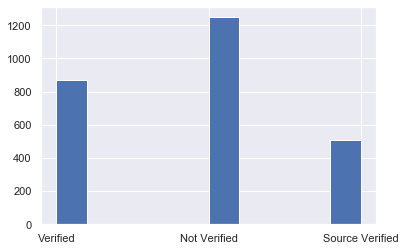

In [342]:
plt.hist(emp_title_null.verification_status)

In [343]:
emp_title_null.groupby('verification_status')['emp_title'].count()

verification_status
Not Verified       1249
Source Verified     506
Verified            871
Name: emp_title, dtype: int64

As I can observe the null values most probably could indicate unemployment status as the emp_title column is not dependent on any of verification statuses. I'll check how the column values correlate with leght of service included in emp_length column.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

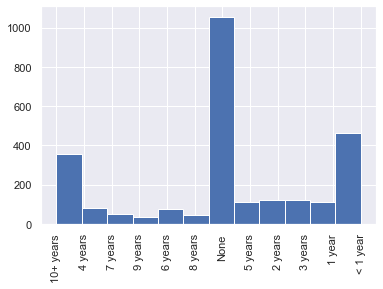

In [344]:
plt.hist(emp_title_null.emp_length, bins = 12)
plt.xticks(rotation='vertical')

In [345]:
emp_title_null.groupby('emp_length')['emp_title'].count()

emp_length
1 year        112
10+ years     358
2 years       123
3 years       121
4 years        82
5 years       109
6 years        74
7 years        51
8 years        46
9 years        34
< 1 year      461
None         1055
Name: emp_title, dtype: int64

As we can observe, among 1112 people who didn't indicate their length of service we have 1055 of those who also didn't indicate their employer in emp_title. I can assume that those people were not employed at the moment, so I'm going to fill their work experience as less then 1 year. We are left with 58 people who did indicate their employer, but didn't fill the length of service column. Therefore I assume their experience is also less then 1 year and replace the 'None' value in emp_length column with '< 1 year' string.

In [346]:
# At first I remove the emp_title column
loans_main = loans_main.drop('emp_title', axis = 1)
loans_main.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0     5000.0       5000.0           4975.0   36 months   10.65%       162.87   
1     2500.0       2500.0           2500.0   60 months   15.27%        59.83   
2     2400.0       2400.0           2400.0   36 months   15.96%        84.33   
3    10000.0      10000.0          10000.0   36 months   13.49%       339.31   
4     3000.0       3000.0           3000.0   60 months   12.69%        67.79   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B        B2  10+ years           RENT     24000.0            Verified   
1     C        C4   < 1 year           RENT     30000.0     Source Verified   
2     C        C5  10+ years           RENT     12252.0        Not Verified   
3     C        C1  10+ years           RENT     49200.0     Source Verified   
4     B        B5     1 year           RENT     80000.0     Source Verified   

    issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0  Dec-2011   Fully Paid     credit_card         AZ  27.65          0.0   
1  Dec-2011  Charged Off             car         GA   1.00          0.0   
2  Dec-2011   Fully Paid  small_business         IL   8.72          0.0   
3  Dec-2011   Fully Paid           other         CA  20.00          0.0   
4  Dec-2011   Fully Paid           other         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0         Jan-1985           735.0            739.0             1.0   
1         Apr-1999           740.0            744.0             5.0   
2         Nov-2001           735.0            739.0             2.0   
3         Feb-1996           690.0            694.0             1.0   
4         Jan-1996           695.0            699.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal revol_util  total_acc   total_pymnt  total_pymnt_inv  \
0    13648.0      83.7%        9.0   5863.155187          5833.84   
1     1687.0       9.4%        4.0   1014.530000          1014.53   
2     2956.0      98.5%       10.0   3005.666844          3005.67   
3     5598.0        21%       37.0  12231.890000         12231.89   
4    27783.0      53.9%       38.0   4066.908161          4066.91   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00         0.0   
1           456.46         435.17                0.00       122.9   
2          2400.00         605.67                0.00         0.0   
3         10000.00        2214.92               16.97         0.0   
4          3000.00        1066.91                0.00         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00     Jan-2015           171.62           Aug-2018   
1                     1.11     Apr-2013           119.66           Oct-2016   
2                     0.00     Jun-2014           649.91           Jun-2017   
3                     0.00     Jan-2015           357.48           Apr-2016   
4                     0.00     Jan-2017            67.30           Apr-2018   

   last_fico_range_high  last_fico_range_low  acc_now_delinq  \
0                 739.0                735.0             0.0   
1                 499.0                  0.0             0.0   
2                 739.0                735.0             0.0   
3                 604.0                600.0             0.0   
4                 684.0                680.0             0.0   

   chargeoff_within_12_mths  delinq_amnt  pub_

In [347]:
# replacing 'None' in emp_length
for i in loans_main.emp_length:
    if i == 'None':
        loans_main.emp_length.replace(i, '< 1 year', inplace = True)
loans_main.emp_length.head(20)

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
5          3 years
6          8 years
7          9 years
8          4 years
9         < 1 year
10         5 years
11       10+ years
12        < 1 year
13         3 years
14         3 years
15        < 1 year
16         4 years
17       10+ years
18          1 year
19         6 years
20         3 years
21       10+ years
22       10+ years
23         5 years
24          1 year
25         2 years
26         9 years
27         2 years
28       10+ years
29        < 1 year
30         7 years
31         5 years
32         2 years
33         2 years
34         7 years
35       10+ years
36         2 years
37          1 year
38          1 year
39          1 year
40         4 years
41       10+ years
42         9 years
43       10+ years
44       10+ years
45         6 years
46       10+ years
47         6 years
48       10+ years
49         5 years
50         8 years
51         9 years
52        < 

In [348]:
# changing the strings to the numeric value:
for i in loans_main.emp_length:
    if i == '< 1 year':
        loans_main.emp_length.replace(i, 0, inplace = True)
    elif i == '1 year':
        loans_main.emp_length.replace(i, 1, inplace = True)
    elif i == '2 years':
        loans_main.emp_length.replace(i, 2, inplace = True)
    elif i == '3 years':
        loans_main.emp_length.replace(i, 3, inplace = True)
    elif i == '4 years':
        loans_main.emp_length.replace(i, 4, inplace = True)
    elif i == '5 years':
        loans_main.emp_length.replace(i, 5, inplace = True)
    elif i == '6 years':
        loans_main.emp_length.replace(i, 6, inplace = True)
    elif i == '7 years':
        loans_main.emp_length.replace(i, 7, inplace = True)
    elif i == '8 years':
        loans_main.emp_length.replace(i, 8, inplace = True)
    elif i == '9 years':
        loans_main.emp_length.replace(i, 9, inplace = True)
    elif i == '10+ years':
        loans_main.emp_length.replace(i, 10, inplace = True)

In [349]:
loans_main.emp_length.dtypes

dtype('int64')

In [350]:
loans_main.shape

(42535, 46)

In [351]:
# checking nulls once again
null_columns_main = loans_main.columns[loans_main.isnull().any()]
nulls_main = loans_main[null_columns_main].isnull().sum().reset_index()
nulls_main = nulls_main.rename({'index': 'columns_names', 0: 'sum'}, axis = 1)
nulls_main

columns_names    sum
0                 annual_inc      4
1                delinq_2yrs     29
2           earliest_cr_line     29
3             inq_last_6mths     29
4     mths_since_last_delinq  26926
5     mths_since_last_record  38884
6                   open_acc     29
7                    pub_rec     29
8                 revol_util     90
9                  total_acc     29
10              last_pymnt_d     83
11        last_credit_pull_d      4
12            acc_now_delinq     29
13  chargeoff_within_12_mths    145
14               delinq_amnt     29
15      pub_rec_bankruptcies   1365
16                 tax_liens    105

We have several columns with 29 missing values. I'd like to check if they are the same rows and can I observe any correlation

In [352]:
check_29 = loans_main[loans_main['delinq_2yrs'].isnull()]
check_29

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
42450     5000.0       5000.0           3025.0   36 months    7.43%   
42451     7000.0       7000.0           3450.0   36 months    7.75%   
42460     4350.0       4350.0            825.0   36 months    8.07%   
42473     3900.0       3900.0           2025.0   36 months    9.33%   
42481     6700.0       6700.0           6700.0   36 months    7.75%   
42484     3200.0       3200.0           2000.0   36 months    9.96%   
42495     7200.0       5075.0            350.0   36 months   10.28%   
42510     1900.0       1900.0            900.0   36 months    9.64%   
42515     1200.0       1200.0            500.0   36 months    9.01%   
42516     5000.0       5000.0            375.0   36 months   11.22%   
42517     1400.0       1400.0            475.0   36 months   10.91%   
42518     1000.0       1000.0            625.0   36 months   14.07%   
42519     5000.0       5000.0            300.0   36 months    7.75%   
42520     2500.0       2500.0            225.0   36 months    7.43%   
42521     3000.0       3000.0            250.0   36 months    7.43%   
42522     2600.0       2600.0            575.0   36 months    8.38%   
42523     1000.0       1000.0            625.0   36 months    7.12%   
42524     6450.0       6450.0              0.0   36 months   11.22%   
42525     1275.0       1275.0              0.0   36 months   12.49%   
42526    10500.0      10500.0            275.0   36 months   11.22%   
42527     3000.0       3000.0            125.0   36 months    9.01%   
42528     3000.0       3000.0              0.0   36 months    9.33%   
42529     2000.0       2000.0            225.0   36 months    9.96%   
42530     6500.0       6500.0              0.0   36 months    9.64%   
42531     3500.0       3500.0            225.0   36 months   10.28%   
42532     1000.0       1000.0              0.0   36 months    9.64%   
42533     2525.0       2525.0            225.0   36 months    9.33%   
42534     6500.0       6500.0              0.0   36 months    8.38%   
42535     5000.0       5000.0              0.0   36 months    7.75%   

       installment grade sub_grade  emp_length home_ownership  annual_inc  \
42450       155.38     A        A2           0           NONE         NaN   
42451       218.55     A        A3           0           NONE         NaN   
42460       136.45     A        A4           0           RENT    120000.0   
42473       124.62     B        B3           0           RENT     98000.0   
42481       209.18     A        A3           0           NONE         NaN   
42484       103.20     B        B5           0       MORTGAGE    150000.0   
42495       164.42     C        C1           0           RENT     95000.0   
42510        61.00     B        B4           1       MORTGAGE    100000.0   
42515        38.17     B        B2           0           RENT     36000.0   
42516       164.23     C        C4           0           RENT     28000.0   
42517        45.78     C        C3           0           RENT     40000.0   
42518        34.21     E        E3          10           RENT     25000.0   
42519       156.11     A        A3          10       MORTGAGE    300000.0   
42520        77.69     A        A2           9       MORTGAGE     66624.0   
42521        93.23     A        A2           1       MORTGAGE     80000.0   
42522        81.94     A        A5           3       MORTGAGE      6500.0   
42523        30.94     A        A1           6           RENT     50000.0   
42524       211.85     C        C4           2           RENT     32000.0   
42525        42.65     D        D3           1           RENT     40000.0   
42526       344.87     C        C4           3           RENT     60000.0   
42527        95.42     B        B2           0           RENT     35000.0   
42528        95.86     B        B3           0            OWN     20000.0   
42529        64.50     B        B5           0           RENT      6000.0   
42530       208.66     B    

In [353]:
check_29[check_29.isnull()].shape

(29, 46)

In [354]:
check_29.describe()

loan_amnt   funded_amnt  funded_amnt_inv  installment  emp_length  \
count     29.000000     29.000000        29.000000    29.000000   29.000000   
mean    3903.448276   3830.172414       837.931034   122.277586    1.931034   
std     2381.895293   2308.412210      1432.648968    74.266853    3.453063   
min     1000.000000   1000.000000         0.000000    30.940000    0.000000   
25%     2000.000000   2000.000000       125.000000    64.500000    0.000000   
50%     3200.000000   3200.000000       300.000000   103.200000    0.000000   
75%     5000.000000   5000.000000       625.000000   164.230000    2.000000   
max    10500.000000  10500.000000      6700.000000   344.870000   10.000000   

          annual_inc        dti  delinq_2yrs  fico_range_low  fico_range_high  \
count      25.000000  29.000000          0.0       29.000000        29.000000   
mean    71204.960000   7.746897          NaN      724.137931       728.137931   
std     65919.884823   4.604633          NaN       43.998153        43.998153   
min      6000.000000   0.390000          NaN      640.000000       644.000000   
25%     28000.000000   4.000000          NaN      695.000000       699.000000   
50%     50000.000000  10.000000          NaN      710.000000       714.000000   
75%     98000.000000  10.000000          NaN      755.000000       759.000000   
max    300000.000000  19.500000          NaN      800.000000       804.000000   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
count             0.0                     0.0                     0.0   
mean              NaN                     NaN                     NaN   
std               NaN                     NaN                     NaN   
min               NaN                     NaN                     NaN   
25%               NaN                     NaN                     NaN   
50%               NaN                     NaN                     NaN   
75%               NaN                     NaN                     NaN   
max               NaN                     NaN                     NaN   

       open_acc  pub_rec  revol_bal  total_acc   total_pymnt  total_pymnt_inv  \
count       0.0      0.0       29.0        0.0     29.000000        29.000000   
mean        NaN      NaN        0.0        NaN   4286.300517       939.166207   
std         NaN      NaN        0.0        NaN   2583.428168      1611.650078   
min         NaN      NaN        0.0        NaN   1113.503768         0.000000   
25%         NaN      NaN        0.0        NaN   2322.408993       143.120000   
50%         NaN      NaN        0.0        NaN   3590.587415       333.950000   
75%         NaN      NaN        0.0        NaN   5858.468448       769.730000   
max         NaN      NaN        0.0        NaN  11219.852169      7530.480000   

       total_rec_prncp  total_rec_int  total_rec_late_fee   recoveries  \
count        29.000000      29.000000           29.000000    29.000000   
mean       3613.603793     466.276897            6.435862   199.983448   
std        2333.738041     297.627392           22.984545   917.929948   
min         340.500000      99.140000            0.000000     0.000000   
25%        1900.000000     219.430000            0.000000     0.000000   
50%        3000.000000     435.000000            0.000000     0.000000   
75%        5000.000000     619.760000            0.000000     0.000000   
max       10500.000000    1228.620000          120.000000  4897.930000   

       collection_recovery_fee  last_pymnt_amnt  last_fico_range_high  \
count                29.000000        29.000000             29.000000   
mean                 69.659328       199.572414            675.413793   
std                 321.344173       422.242256            153.807978   
min                   0.000000         0.000000              0.000000   
25%                   0.000000        21.750000            614.000000   
50%                   0.000000        95.660000            709.000000   
75

In [355]:
loans[loans['annual_inc'].isnull()]

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
42450     5000.0       5000.0           3025.0   36 months    7.43%   
42451     7000.0       7000.0           3450.0   36 months    7.75%   
42481     6700.0       6700.0           6700.0   36 months    7.75%   
42534     6500.0       6500.0              0.0   36 months    8.38%   

       installment grade sub_grade emp_title emp_length home_ownership  \
42450       155.38     A        A2       NaN   < 1 year           NONE   
42451       218.55     A        A3       NaN   < 1 year           NONE   
42481       209.18     A        A3       NaN   < 1 year           NONE   
42534       204.84     A        A5       NaN   < 1 year           NONE   

       annual_inc verification_status   issue_d  \
42450         NaN        Not Verified  Aug-2007   
42451         NaN        Not Verified  Aug-2007   
42481         NaN        Not Verified  Jul-2007   
42534         NaN        Not Verified  Jun-2007   

                                              loan_status purpose addr_state  \
42450  Does not meet the credit policy. Status:Fully Paid   other         NY   
42451  Does not meet the credit policy. Status:Fully Paid   other         NY   
42481  Does not meet the credit policy. Status:Fully Paid   other         NY   
42534  Does not meet the credit policy. Status:Fully Paid   other         NY   

       dti  delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
42450  1.0          NaN              NaN           800.0            804.0   
42451  1.0          NaN              NaN           800.0            804.0   
42481  1.0          NaN              NaN           800.0            804.0   
42534  4.0          NaN              NaN           740.0            744.0   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
42450             NaN                     NaN                     NaN   
42451             NaN                     NaN                     NaN   
42481             NaN                     NaN                     NaN   
42534             NaN                     NaN                     NaN   

       open_acc  pub_rec  revol_bal revol_util  total_acc  total_pymnt  \
42450       NaN      NaN        0.0        NaN        NaN  5593.631614   
42451       NaN      NaN        0.0        NaN        NaN  7867.655865   
42481       NaN      NaN        0.0        NaN        NaN  7530.481427   
42534       NaN      NaN        0.0        NaN        NaN  7373.904962   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
42450          3384.14           5000.0         593.63                 0.0   
42451          3877.63           7000.0         867.66                 0.0   
42481          7530.48           6700.0         830.48                 0.0   
42534             0.00           6500.0         873.90                 0.0   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
42450         0.0                      0.0     Aug-2010           157.31   
42451         0.0                      0.0     Aug-2010           220.03   
42481         0.0                      0.0     Jul-2010           209.89   
42534         0.0                      0.0     Jun-2010           205.32   

      last_credit_pull_d  last_fico_range_high  last_fico_range_low  \
42450           May-2007                 804.0                800.0   
42451           May-2007                 804.0                800.0   
42481           May-2007                 804.0                800.0   
42534           Aug-2007                 724.0                720.0   

       acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
42450             NaN                       NaN          NaN   
42451             NaN                       NaN          NaN   
42481             NaN                       NaN          NaN   
42534             NaN                       NaN          NaN   

       pub_rec_bankruptcies  tax_liens debt_settlem

It's been confirmed above that all rows that missed 29 values are the same ones. Probobly I could remove them with no harm for further work, but since it' the exercise I'll take a challange to elaborate them. 
I presume these are people who had never had a credit before, though some of them have mortages, but I suppose they don't count here. Therefore they didn't have open accounts, past-due incidences of delinquency, credit inquieries, they hadn't also beeen mentioned in any public records or had any revolting lines and so on. Knowing that I have decided to fill gaps which can be replaced with zeros and earliest_cr_line withe the date of issueing that loan as we have no information on revious credit lines. We also have 4 empty rows in annual_income, that don't have employer title, all of them have less then a year work experience, therefore I assume they have recently started at the market and so they wouldn't generate any annual income. I fill NaN's with "0" then.

In [356]:
loans_main.fillna({'annual_inc':0, 'delinq_2yrs':0, 'earliest_cr_line': loans_main.issue_d, 'inq_last_6mths': 0, 'open_acc': 0, 'pub_rec': 0, 'total_acc': 0, 'acc_now_delinq' :0, 'delinq_amnt': 0}, inplace = True)
loans_main.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0     5000.0       5000.0           4975.0   36 months   10.65%       162.87   
1     2500.0       2500.0           2500.0   60 months   15.27%        59.83   
2     2400.0       2400.0           2400.0   36 months   15.96%        84.33   
3    10000.0      10000.0          10000.0   36 months   13.49%       339.31   
4     3000.0       3000.0           3000.0   60 months   12.69%        67.79   

  grade sub_grade  emp_length home_ownership  annual_inc verification_status  \
0     B        B2          10           RENT     24000.0            Verified   
1     C        C4           0           RENT     30000.0     Source Verified   
2     C        C5          10           RENT     12252.0        Not Verified   
3     C        C1          10           RENT     49200.0     Source Verified   
4     B        B5           1           RENT     80000.0     Source Verified   

    issue_d  loan_status         purpose addr_state    dti  delinq_2yrs  \
0  Dec-2011   Fully Paid     credit_card         AZ  27.65          0.0   
1  Dec-2011  Charged Off             car         GA   1.00          0.0   
2  Dec-2011   Fully Paid  small_business         IL   8.72          0.0   
3  Dec-2011   Fully Paid           other         CA  20.00          0.0   
4  Dec-2011   Fully Paid           other         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0         Jan-1985           735.0            739.0             1.0   
1         Apr-1999           740.0            744.0             5.0   
2         Nov-2001           735.0            739.0             2.0   
3         Feb-1996           690.0            694.0             1.0   
4         Jan-1996           695.0            699.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal revol_util  total_acc   total_pymnt  total_pymnt_inv  \
0    13648.0      83.7%        9.0   5863.155187          5833.84   
1     1687.0       9.4%        4.0   1014.530000          1014.53   
2     2956.0      98.5%       10.0   3005.666844          3005.67   
3     5598.0        21%       37.0  12231.890000         12231.89   
4    27783.0      53.9%       38.0   4066.908161          4066.91   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00         0.0   
1           456.46         435.17                0.00       122.9   
2          2400.00         605.67                0.00         0.0   
3         10000.00        2214.92               16.97         0.0   
4          3000.00        1066.91                0.00         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00     Jan-2015           171.62           Aug-2018   
1                     1.11     Apr-2013           119.66           Oct-2016   
2                     0.00     Jun-2014           649.91           Jun-2017   
3                     0.00     Jan-2015           357.48           Apr-2016   
4                     0.00     Jan-2017            67.30           Apr-2018   

   last_fico_range_high  last_fico_range_low  acc_now_delinq  \
0                 739.0                735.0             0.0   
1                 499.0                  0.0             0.0   
2                 739.0                735.0             0.0   
3                 604.0                600.0             0.0   
4                 684.0                680.0             0.0   

   chargeoff_within_12_mths  delinq_amnt

In [357]:
loans_main.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  0
mths_since_last_delinq      26926
mths_since_last_record      38884
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                     90
total_acc                       0
total_pymnt   

Now I'm going to check 'revol_util column'. It concerns the utilisation rate of credit line. We have 90 null values here. As I'm not fully aware how this rate is calculated, I'm going to fill 'revol_util' with mode vales . Missing values in pub_rec_bancruptcies (Public Records) I fill with zeros, same with 'tax_liens' and 'chargeoff_within_12_mths' because I assume, that these values as being quite important, would have been filled in in the data otherwise.

In [358]:
loans_main.fillna({'pub_rec_bankruptcies': 0, 'tax_liens': 0, 'chargeoff_within_12_mths' :0}, inplace = True)
loans_main['revol_util'].fillna(loans_main['revol_util'].mode()[0], inplace=True)
loans_main.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  0
mths_since_last_delinq      26926
mths_since_last_record      38884
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc                       0
total_pymnt   

In [359]:
# We are left with date values. Starting form the smalest amount of nulls (last_credit_pull_d), after deep other column values, I've decided to replace empty ones with the latest possible date of payment.
loans_main.last_credit_pull_d.fillna(loans_main.last_pymnt_d, inplace=True)

In [360]:
# last_payment_d. We have 83 nulls here. I suppose this is empty, because the loan wasn't fully paid. 
# I'm going to check it with loans status column.
last_payment = loans_main[loans_main['last_pymnt_d'].isnull()]
last_payment.groupby('loan_status')[['loan_amnt', 'total_pymnt']].sum()

loan_amnt  total_pymnt
loan_status                                                                
Charged Off                                           589850.0     43879.15
Does not meet the credit policy. Status:Charged Off    99700.0      3101.30

As we can observe, all empty records have 'Charged Off' status. 
For my first analisys I don't need this column because having confirmed above presumtion, I know that either borrower paid averything and their status is 'Fully Paid', or they didn't pay and their status is 'Charged Off'. Therefore last payment date info has no influence on the status of the loan. For this part of analysis I've also decided to leave 'mths_since_last_delinq', 'mths_since_last_record' columns as they are, though they have many nulls. I'm going to get back to this information in my other analysis.
Now, to complete data processing, I'm going to change the types for date columns and percentage columns in main table(loans_main).

In [361]:
#checking again left columns types
loans_main.dtypes

loan_amnt                   float64
funded_amnt                 float64
funded_amnt_inv             float64
term                         object
int_rate                     object
installment                 float64
grade                        object
sub_grade                    object
emp_length                    int64
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
purpose                      object
addr_state                   object
dti                         float64
delinq_2yrs                 float64
earliest_cr_line             object
fico_range_low              float64
fico_range_high             float64
inq_last_6mths              float64
mths_since_last_delinq      float64
mths_since_last_record      float64
open_acc                    float64
pub_rec                     float64
revol_bal                   float64
revol_util                  

In [362]:
# checking if we have columns with zero mean - this could mean all values are zeros
loans_main.mean() == 0

loan_amnt                   False
funded_amnt                 False
funded_amnt_inv             False
installment                 False
emp_length                  False
annual_inc                  False
dti                         False
delinq_2yrs                 False
fico_range_low              False
fico_range_high             False
inq_last_6mths              False
mths_since_last_delinq      False
mths_since_last_record      False
open_acc                    False
pub_rec                     False
revol_bal                   False
total_acc                   False
total_pymnt                 False
total_pymnt_inv             False
total_rec_prncp             False
total_rec_int               False
total_rec_late_fee          False
recoveries                  False
collection_recovery_fee     False
last_pymnt_amnt             False
last_fico_range_high        False
last_fico_range_low         False
acc_now_delinq              False
chargeoff_within_12_mths     True
delinq_amnt   

In [363]:
loans_main.drop('chargeoff_within_12_mths', axis = 1, inplace = True)

In [364]:
#changing percentage strings for floats
loans_main['int_rate'] = loans_main['int_rate'].str[:-1].astype(float)

In [365]:
loans_main['revol_util'] = loans_main['revol_util'].str[:-1].astype(float)

In [366]:
loans_main['term'] = loans_main['term'].str[:-7].astype(int)

In [367]:
loans_main['total_pymnt'] = round(loans_main['total_pymnt'], 2)

In [368]:
#changing date values
loans_main['issue_d'] = pd.to_datetime(loans_main['issue_d'])

In [369]:
loans_main['issue_d'] = pd.to_datetime(loans_main['issue_d'])

In [370]:
loans_main['earliest_cr_line'] = pd.to_datetime(loans_main['earliest_cr_line']).astype('datetime64[D]')

In [371]:
loans_main['last_pymnt_d'] = pd.to_datetime(loans_main['last_pymnt_d']).astype('datetime64[D]')

In [372]:
loans_main['last_credit_pull_d'] = pd.to_datetime(loans_main['last_credit_pull_d']).astype('datetime64[D]')

In [373]:
loans_main.dtypes

loan_amnt                         float64
funded_amnt                       float64
funded_amnt_inv                   float64
term                                int32
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                          int64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
addr_state                         object
dti                               float64
delinq_2yrs                       float64
earliest_cr_line           datetime64[ns]
fico_range_low                    float64
fico_range_high                   float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
mths_since_last_record            

In [374]:
# unifying the loan_status column as right now it has 4 values. 
# dividing this information into 2 columns: one reflecting loan status: Fully Paid or Charged Off and second one pointing if request met credit policy.

loans_main['loan_status'].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [375]:
policy_code = loans_main['loan_status'].str.split(':',1, expand=True).rename(columns = {0: 'loan_status', 1: 'policy_code'})
policy_code.head()

loan_status policy_code
0   Fully Paid        None
1  Charged Off        None
2   Fully Paid        None
3   Fully Paid        None
4   Fully Paid        None

In [376]:
loans_main = pd.merge(loans_main, policy_code, right_index=True, left_index=True)

In [377]:
loans_main.policy_code.unique()

array([None, 'Fully Paid', 'Charged Off'], dtype=object)

In [378]:
loans_main.policy_code.fillna(1, inplace = True)
loans_main.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0     5000.0       5000.0           4975.0    36     10.65       162.87     B   
1     2500.0       2500.0           2500.0    60     15.27        59.83     C   
2     2400.0       2400.0           2400.0    36     15.96        84.33     C   
3    10000.0      10000.0          10000.0    36     13.49       339.31     C   
4     3000.0       3000.0           3000.0    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           0           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
4        B5           1           RENT     80000.0     Source Verified   

     issue_d loan_status_x         purpose addr_state    dti  delinq_2yrs  \
0 2011-12-01    Fully Paid     credit_card         AZ  27.65          0.0   
1 2011-12-01   Charged Off             car         GA   1.00          0.0   
2 2011-12-01    Fully Paid  small_business         IL   8.72          0.0   
3 2011-12-01    Fully Paid           other         CA  20.00          0.0   
4 2011-12-01    Fully Paid           other         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0       1985-01-01           735.0            739.0             1.0   
1       1999-04-01           740.0            744.0             5.0   
2       2001-11-01           735.0            739.0             2.0   
3       1996-02-01           690.0            694.0             1.0   
4       1996-01-01           695.0            699.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0    13648.0        83.7        9.0      5863.16          5833.84   
1     1687.0         9.4        4.0      1014.53          1014.53   
2     2956.0        98.5       10.0      3005.67          3005.67   
3     5598.0        21.0       37.0     12231.89         12231.89   
4    27783.0        53.9       38.0      4066.91          4066.91   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0          5000.00         863.16                0.00         0.0   
1           456.46         435.17                0.00       122.9   
2          2400.00         605.67                0.00         0.0   
3         10000.00        2214.92               16.97         0.0   
4          3000.00        1066.91                0.00         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                     0.00   2015-01-01           171.62         2018-08-01   
1                     1.11   2013-04-01           119.66         2016-10-01   
2                     0.00   2014-06-01           649.91         2017-06-01   
3                     0.00   2015-01-01           357.48         2016-04-01   
4                     0.00   2017-01-01            67.30         2018-04-01   

   last_fico_range_high  last_fico_range_low  acc_now_delinq  delinq_amnt  \
0                 739.0                735.0             0.0          0.0   
1                 499.0                  0.0             0.0          0.0   
2                 739.0                735.0             0.0          0.0   
3                 604.0                600.0             0.0          0.0   
4                 684.0                680.0             0

In [379]:
loans_main.loan_status_y.replace('Does not meet the credit policy. Status', loans_main.policy_code, inplace = True)

In [380]:
loans_main.loan_status_y.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [381]:
loans_main.policy_code.replace('Charged Off', 0, inplace = True)
loans_main.policy_code.replace('Fully Paid', 0, inplace = True)

In [382]:
loans_main.rename(columns={'loan_status_y': 'loan_status'}, inplace = True)

In [383]:
loans_main.drop('loan_status_x', axis = 1, inplace = True)

In [384]:
loans_main.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0     5000.0       5000.0           4975.0    36     10.65       162.87     B   
1     2500.0       2500.0           2500.0    60     15.27        59.83     C   
2     2400.0       2400.0           2400.0    36     15.96        84.33     C   
3    10000.0      10000.0          10000.0    36     13.49       339.31     C   
4     3000.0       3000.0           3000.0    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           0           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
4        B5           1           RENT     80000.0     Source Verified   

     issue_d         purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0 2011-12-01     credit_card         AZ  27.65          0.0       1985-01-01   
1 2011-12-01             car         GA   1.00          0.0       1999-04-01   
2 2011-12-01  small_business         IL   8.72          0.0       2001-11-01   
3 2011-12-01           other         CA  20.00          0.0       1996-02-01   
4 2011-12-01           other         OR  17.94          0.0       1996-01-01   

   fico_range_low  fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0           735.0            739.0             1.0                     NaN   
1           740.0            744.0             5.0                     NaN   
2           735.0            739.0             2.0                     NaN   
3           690.0            694.0             1.0                    35.0   
4           695.0            699.0             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0    13648.0        83.7   
1                     NaN       3.0      0.0     1687.0         9.4   
2                     NaN       2.0      0.0     2956.0        98.5   
3                     NaN      10.0      0.0     5598.0        21.0   
4                     NaN      15.0      0.0    27783.0        53.9   

   total_acc  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0        9.0      5863.16          5833.84          5000.00         863.16   
1        4.0      1014.53          1014.53           456.46         435.17   
2       10.0      3005.67          3005.67          2400.00         605.67   
3       37.0     12231.89         12231.89         10000.00        2214.92   
4       38.0      4066.91          4066.91          3000.00        1066.91   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00         0.0                     0.00   2015-01-01   
1                0.00       122.9                     1.11   2013-04-01   
2                0.00         0.0                     0.00   2014-06-01   
3               16.97         0.0                     0.00   2015-01-01   
4                0.00         0.0                     0.00   2017-01-01   

   last_pymnt_amnt last_credit_pull_d  last_fico_range_high  \
0           171.62         2018-08-01                 739.0   
1           119.66         2016-10-01                 499.0   
2           649.91         2017-06-01                 739.0   
3           357.48         2016-04-01                 604.0   
4            67.30         2018-04-01                 684.0   

   last_fico_range_low  acc_now_delinq  delinq_amnt  pub_rec_bankruptcies  \
0                735.0             0.0          0.0                   0.0   
1                  0.0             0.0          0.0                   0.0   
2                735.0             0.0          0.0                   0.0   
3                600.0             0.0          0.0                   0.0   
4         

Now, I can try to process the first correlation chart

In [385]:
corr=round(loans_main.corr(), 2)
corr

loan_amnt  funded_amnt  funded_amnt_inv  term  \
loan_amnt                     1.00         0.98             0.93  0.36   
funded_amnt                   0.98         1.00             0.95  0.34   
funded_amnt_inv               0.93         0.95             1.00  0.36   
term                          0.36         0.34             0.36  1.00   
int_rate                      0.29         0.30             0.28  0.43   
installment                   0.93         0.96             0.89  0.10   
emp_length                    0.16         0.16             0.18  0.11   
annual_inc                    0.28         0.27             0.25  0.04   
dti                           0.07         0.06             0.07  0.08   
delinq_2yrs                  -0.03        -0.03            -0.04  0.00   
fico_range_low                0.13         0.13             0.14  0.00   
fico_range_high               0.13         0.13             0.14  0.00   
inq_last_6mths               -0.03        -0.03            -0.07 -0.01   
mths_since_last_delinq        0.02         0.02             0.10  0.06   
mths_since_last_record        0.03         0.03             0.49  0.34   
open_acc                      0.18         0.18             0.16  0.05   
pub_rec                      -0.05        -0.05            -0.06  0.01   
revol_bal                     0.25         0.25             0.21  0.03   
revol_util                    0.07         0.07             0.07  0.07   
total_acc                     0.26         0.25             0.24  0.10   
total_pymnt                   0.88         0.90             0.87  0.34   
total_pymnt_inv               0.84         0.86             0.91  0.36   
total_rec_prncp               0.85         0.87             0.84  0.23   
total_rec_int                 0.73         0.74             0.73  0.53   
total_rec_late_fee            0.04         0.05             0.02  0.01   
recoveries                    0.13         0.13             0.12  0.10   
collection_recovery_fee       0.07         0.08             0.06  0.03   
last_pymnt_amnt               0.45         0.45             0.44  0.23   
last_fico_range_high          0.08         0.08             0.09 -0.06   
last_fico_range_low           0.07         0.07             0.09 -0.05   
acc_now_delinq               -0.01        -0.01            -0.01 -0.01   
delinq_amnt                  -0.00        -0.00            -0.01 -0.00   
pub_rec_bankruptcies         -0.04        -0.04            -0.04  0.02   
tax_liens                    -0.01        -0.01            -0.01 -0.00   
policy_code                   0.07         0.07             0.14  0.09   

                         int_rate  installment  emp_length  annual_inc   dti  \
loan_amnt                    0.29         0.93        0.16        0.28  0.07   
funded_amnt                  0.30         0.96        0.16        0.27  0.06   
funded_amnt_inv              0.28         0.89        0.18        0.25  0.07   
term                         0.43         0.10        0.11        0.04  0.08   
int_rate                     1.00         0.27        0.01        0.05  0.12   
installment                  0.27         1.00        0.14        0.28  0.05   
emp_length                   0.01         0.14        1.00        0.13  0.06   
annual_inc                   0.05         0.28        0.13        1.00 -0.12   
dti                          0.12         0.05        0.06       -0.12  1.00   
delinq_2yrs                  0.15        -0.02        0.01        0.02 -0.04   
fico_range_low              -0.70         0.06        0.07        0.05 -0.19   
fico_range_high             -0.70         0.06        0.07        0.05 -0.19   
inq_last_6mths               0.18        -0.01       -0.02        0.03  0.01   
mths_since_last_delinq      -0.05         0.00        0.06       -0.00  0.07   
mths_since_last_record       0.23        -0.04        0.25       -0.00  0.13   
open_acc                     0.03         0.18        0.10        0.17  0.30   


Text(0.5, 1, 'Correlation between features')

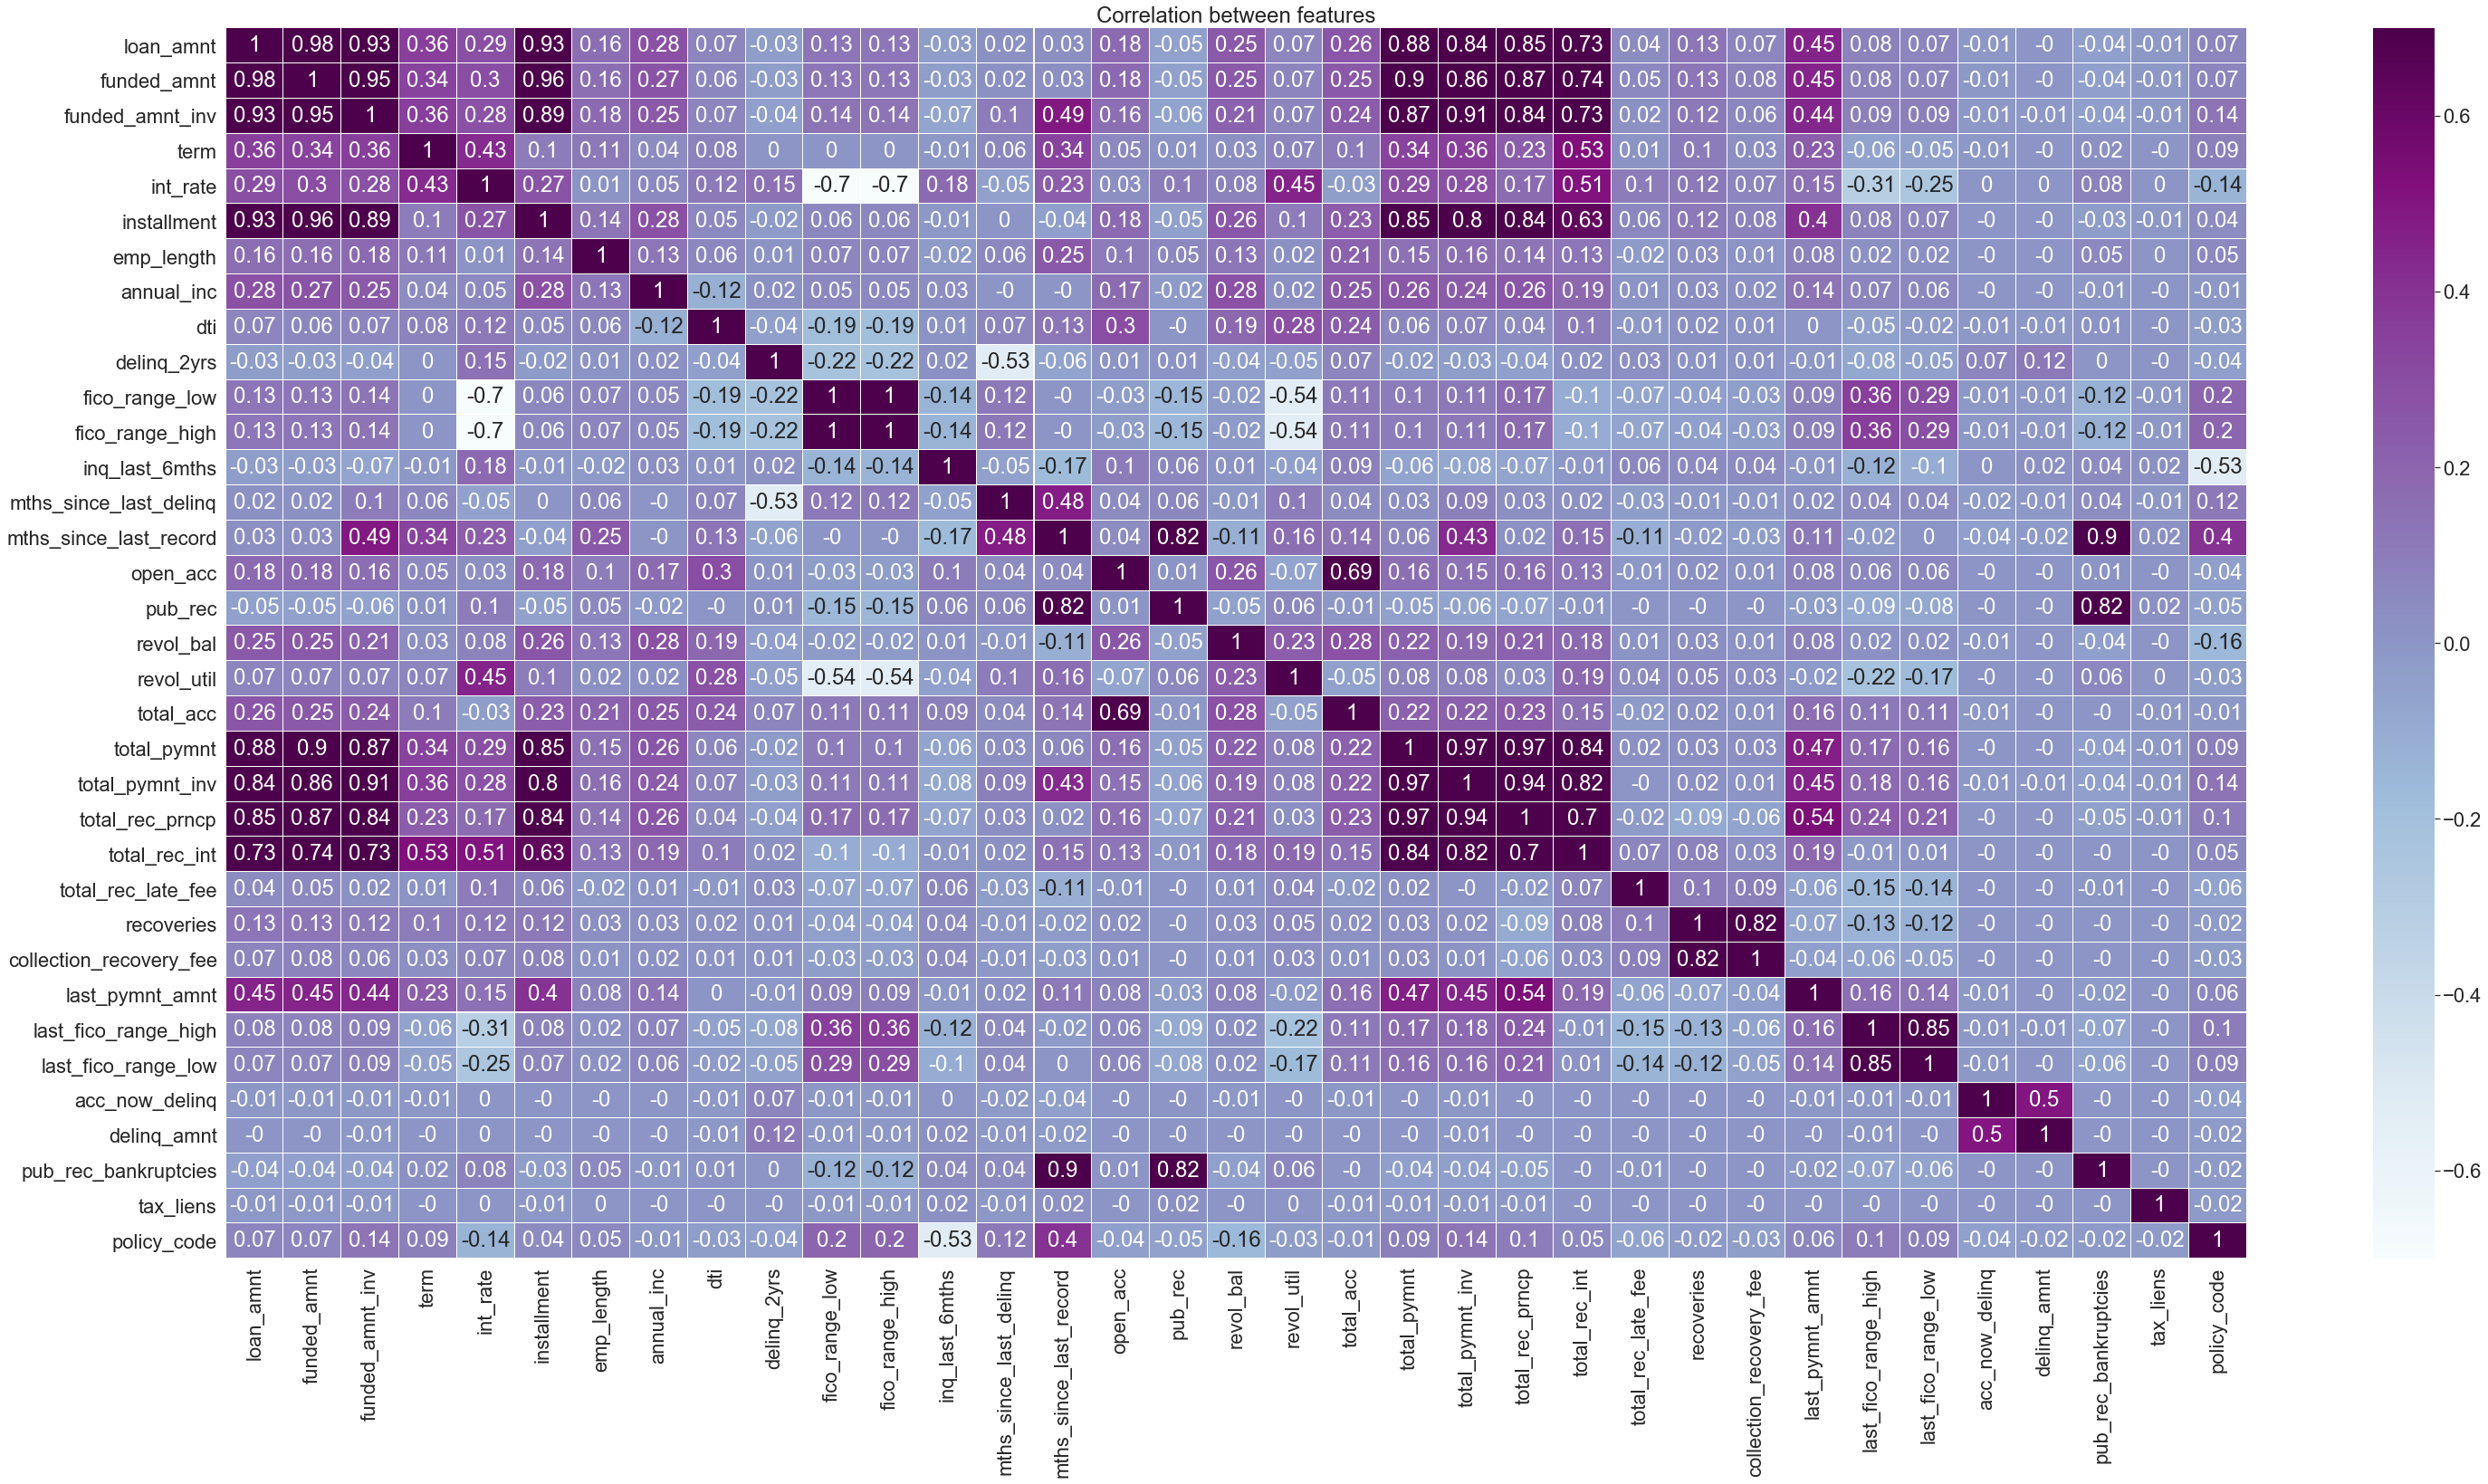

In [386]:
sns.set(font_scale= 2)
plt.figure(figsize=(50, 25))

sns.heatmap(corr, vmax=.7, linewidths=0.01,
            annot=True, cmap="BuPu",linecolor="white")
plt.title('Correlation between features')

We can observe some obvious correlation here: between the loan's amount, funded amount and installment or total payment. Although there are too many features to find strong correlation. I'll look closer to these strongest correlation.

In [387]:
loans_main_corr = loans_main.corr()['loan_amnt']
main_list = loans_main_corr[abs(loans_main_corr) > 0.5]
main_list

loan_amnt          1.000000
funded_amnt        0.981746
funded_amnt_inv    0.929600
installment        0.930869
total_pymnt        0.882845
total_pymnt_inv    0.844184
total_rec_prncp    0.850882
total_rec_int      0.729111
Name: loan_amnt, dtype: float64

In [388]:
amount_df = loans_main[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_rec_prncp']]
corr_amount = amount_df.corr()
corr_amount

loan_amnt  funded_amnt  funded_amnt_inv  installment  \
loan_amnt         1.000000     0.981746         0.929600     0.930869   
funded_amnt       0.981746     1.000000         0.947527     0.956522   
funded_amnt_inv   0.929600     0.947527         1.000000     0.890151   
installment       0.930869     0.956522         0.890151     1.000000   
total_pymnt       0.882845     0.898986         0.873398     0.848603   
total_rec_prncp   0.850882     0.868776         0.841547     0.843359   

                 total_pymnt  total_rec_prncp  
loan_amnt           0.882845         0.850882  
funded_amnt         0.898986         0.868776  
funded_amnt_inv     0.873398         0.841547  
installment         0.848603         0.843359  
total_pymnt         1.000000         0.972464  
total_rec_prncp     0.972464         1.000000

I've noticed that loan_amnt and funded_amnt are not 100% correlatated. I'll check why there is a difference.

In [389]:
loans_main[(loans_main.loan_amnt>loans_main.funded_amnt)]['loan_amnt'].count()

1997

As not always borrower received the mount they had inquaired for, we have 1997 cases like that, I decided to focus in my further research on funded amount as this the real loan amount the borrowers received. I've also decided ommit the amout funded and earn by investors in my further analisys as that is not the subject of this work.

In [390]:
# checking the correlation between all FICO columns
fico_df = loans_main[['fico_range_low', 'fico_range_high', 'last_fico_range_high', 'last_fico_range_low']]
fico_df.corr()

fico_range_low  fico_range_high  last_fico_range_high  \
fico_range_low              1.000000         1.000000              0.363021   
fico_range_high             1.000000         1.000000              0.363021   
last_fico_range_high        0.363021         0.363021              1.000000   
last_fico_range_low         0.285953         0.285953              0.852463   

                      last_fico_range_low  
fico_range_low                   0.285953  
fico_range_high                  0.285953  
last_fico_range_high             0.852463  
last_fico_range_low              1.000000

In [391]:
fico_df.describe()

fico_range_low  fico_range_high  last_fico_range_high  \
count    42535.000000     42535.000000          42535.000000   
mean       713.052545       717.052545            689.922511   
std         36.188439        36.188439             80.818099   
min        610.000000       614.000000              0.000000   
25%        685.000000       689.000000            644.000000   
50%        710.000000       714.000000            699.000000   
75%        740.000000       744.000000            749.000000   
max        825.000000       829.000000            850.000000   

       last_fico_range_low  
count         42535.000000  
mean            676.952039  
std             119.647752  
min               0.000000  
25%             640.000000  
50%             695.000000  
75%             745.000000  
max             845.000000

I can see we have some zero values in both last FICO columns. As FICO score can't be zero as the lowest is 300. I've decided to skip those two columns, despite filling them with some random values. I'll stick to first FICO values

(array([4.000e+00, 8.000e+00, 1.070e+02, 2.430e+02, 1.711e+03, 3.675e+03,
        6.532e+03, 4.398e+03, 4.237e+03, 3.662e+03, 3.840e+03, 3.323e+03,
        2.809e+03, 3.378e+03, 1.591e+03, 1.227e+03, 8.280e+02, 5.940e+02,
        3.180e+02, 5.000e+01]),
 array([614.  , 624.75, 635.5 , 646.25, 657.  , 667.75, 678.5 , 689.25,
        700.  , 710.75, 721.5 , 732.25, 743.  , 753.75, 764.5 , 775.25,
        786.  , 796.75, 807.5 , 818.25, 829.  ]),
 <a list of 20 Patch objects>)

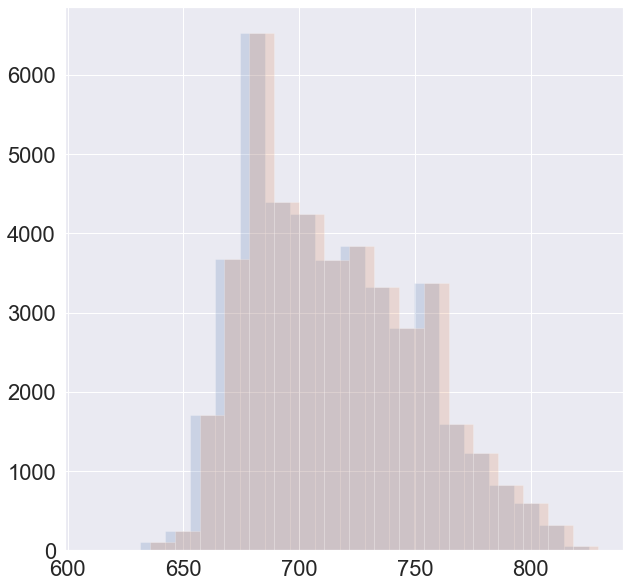

In [392]:
f, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.set(font_scale= 1)
plt.hist(loans_main.fico_range_low, alpha = 0.2, label = 'fico_range_low', bins = 20)
plt.hist(loans_main.fico_range_high, alpha = 0.2, label = 'fico_range_high', bins = 20)

In [393]:
# As we can observe the low and high values are very similar, therefore I'm going to use mean for those two columns.
loans_main['FICO_mean'] = (loans_main['fico_range_low'] + loans_main['fico_range_high'])/2

## Exploratory Data Analysis (EDA)

For the moment the basic table is ready. Now, first of all, I'm going to check some correlation between potential targets and most important features like: funded_amount, loan status, annual income, FICO ratings, grades (discription of the risk), employment length, home ownership, purpose of loan, Debt-to-Income rate (dti), verification status, credit history length. Therefore I'll create the 'top' dataframe with all these features.

In [394]:
loans_top = loans_main[['loan_status', 'funded_amnt', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'FICO_mean', 'purpose', 'dti', 'total_pymnt']]
loans_top.head()

loan_status  funded_amnt  installment grade  emp_length home_ownership  \
0   Fully Paid       5000.0       162.87     B          10           RENT   
1  Charged Off       2500.0        59.83     C           0           RENT   
2   Fully Paid       2400.0        84.33     C          10           RENT   
3   Fully Paid      10000.0       339.31     C          10           RENT   
4   Fully Paid       3000.0        67.79     B           1           RENT   

   annual_inc verification_status  FICO_mean         purpose    dti  \
0     24000.0            Verified      737.0     credit_card  27.65   
1     30000.0     Source Verified      742.0             car   1.00   
2     12252.0        Not Verified      737.0  small_business   8.72   
3     49200.0     Source Verified      692.0           other  20.00   
4     80000.0     Source Verified      697.0           other  17.94   

   total_pymnt  
0      5863.16  
1      1014.53  
2      3005.67  
3     12231.89  
4      4066.91

In [395]:
loans_dummies = pd.get_dummies(loans_top)
loans_dummies.head()

funded_amnt  installment  emp_length  annual_inc  FICO_mean    dti  \
0       5000.0       162.87          10     24000.0      737.0  27.65   
1       2500.0        59.83           0     30000.0      742.0   1.00   
2       2400.0        84.33          10     12252.0      737.0   8.72   
3      10000.0       339.31          10     49200.0      692.0  20.00   
4       3000.0        67.79           1     80000.0      697.0  17.94   

   total_pymnt  loan_status_Charged Off  loan_status_Fully Paid  grade_A  \
0      5863.16                        0                       1        0   
1      1014.53                        1                       0        0   
2      3005.67                        0                       1        0   
3     12231.89                        0                       1        0   
4      4066.91                        0                       1        0   

   grade_B  grade_C  grade_D  grade_E  grade_F  grade_G  \
0        1        0        0        0        0        0   
1        0        1        0        0        0        0   
2        0        1        0        0        0        0   
3        0        1        0        0        0        0   
4        1        0        0        0        0        0   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   

   home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  \
0                   0                    1                                 0   
1                   0                    1                                 0   
2                   0                    1                                 1   
3                   0                    1                                 0   
4                   0                    1                                 0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             0   
3                                    1                             0   
4                                    1                             0   

   purpose_car  purpose_credit_card  purpose_debt_consolidation  \
0            0                    1                           0   
1            1                    0                           0   
2            0                    0                           0   
3            0                    0                           0   
4            0                    0                           0   

   purpose_educational  purpose_home_improvement  purpose_house  \
0                    0                         0              0   
1                    0                         0              0   
2                    0                         0              0   
3                    0                         0              0   
4                    0                         0              0   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                       0                0               0              0   
1                       0                0               0              0   
2                       0                0               0              0   
3                       0                0               0              1   
4                       0                0               0              1   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                         0                       0      

In [396]:
corr_top=round(loans_dummies.corr(), 2)
corr_top

funded_amnt  installment  emp_length  \
funded_amnt                                 1.00         0.96        0.16   
installment                                 0.96         1.00        0.14   
emp_length                                  0.16         0.14        1.00   
annual_inc                                  0.27         0.28        0.13   
FICO_mean                                   0.13         0.06        0.07   
dti                                         0.06         0.05        0.06   
total_pymnt                                 0.90         0.85        0.15   
loan_status_Charged Off                     0.04         0.02        0.01   
loan_status_Fully Paid                     -0.04        -0.02       -0.01   
grade_A                                    -0.19        -0.18        0.01   
grade_B                                    -0.00        -0.01        0.00   
grade_C                                    -0.01        -0.01       -0.02   
grade_D                                     0.05         0.06       -0.00   
grade_E                                     0.14         0.11        0.01   
grade_F                                     0.14         0.13        0.01   
grade_G                                     0.09         0.10        0.00   
home_ownership_MORTGAGE                     0.17         0.14        0.24   
home_ownership_NONE                        -0.01        -0.01       -0.01   
home_ownership_OTHER                       -0.01        -0.00       -0.02   
home_ownership_OWN                         -0.03        -0.03        0.01   
home_ownership_RENT                        -0.15        -0.13       -0.24   
verification_status_Not Verified           -0.32        -0.27       -0.06   
verification_status_Source Verified        -0.08        -0.09       -0.04   
verification_status_Verified                0.41         0.37        0.10   
purpose_car                                -0.11        -0.13       -0.01   
purpose_credit_card                         0.03         0.04       -0.01   
purpose_debt_consolidation                  0.19         0.19        0.03   
purpose_educational                        -0.06        -0.05       -0.04   
purpose_home_improvement                    0.01        -0.00        0.06   
purpose_house                               0.02         0.02       -0.00   
purpose_major_purchase                     -0.10        -0.10       -0.02   
purpose_medical                            -0.05        -0.06        0.00   
purpose_moving                             -0.07        -0.07       -0.05   
purpose_other                              -0.15        -0.14       -0.02   
purpose_renewable_energy                   -0.02        -0.02        0.01   
purpose_small_business                      0.07         0.08       -0.02   
purpose_vacation                           -0.07        -0.07        0.01   
purpose_wedding                            -0.03        -0.02       -0.04   

                                     annual_inc  FICO_mean   dti  total_pymnt  \
funded_amnt                                0.27       0.13  0.06         0.90   
installment                                0.28       0.06  0.05         0.85   
emp_length                                 0.13       0.07  0.06         0.15   
annual_inc                                 1.00       0.05 -0.12         0.26   
FICO_mean                                  0.05       1.00 -0.19         0.10   
dti                                       -0.12      -0.19  1.00         0.06   
total_pymnt                                0.26       0.10  0.06         1.00   
loan_status_Charged Off                   -0.04      -0.14  0.04        -0.25   
loan_status_Fully Paid                     0.04       0.14 -0.04         0.25   
grade_A                                   -0.02       0.60 -0.11        -0.19   
grade_B                                   -0.01       0.13  0.00        -0.01   
grade_C                                   -0.01      -0.21  0

Text(0.5, 1, 'Correlation between features')

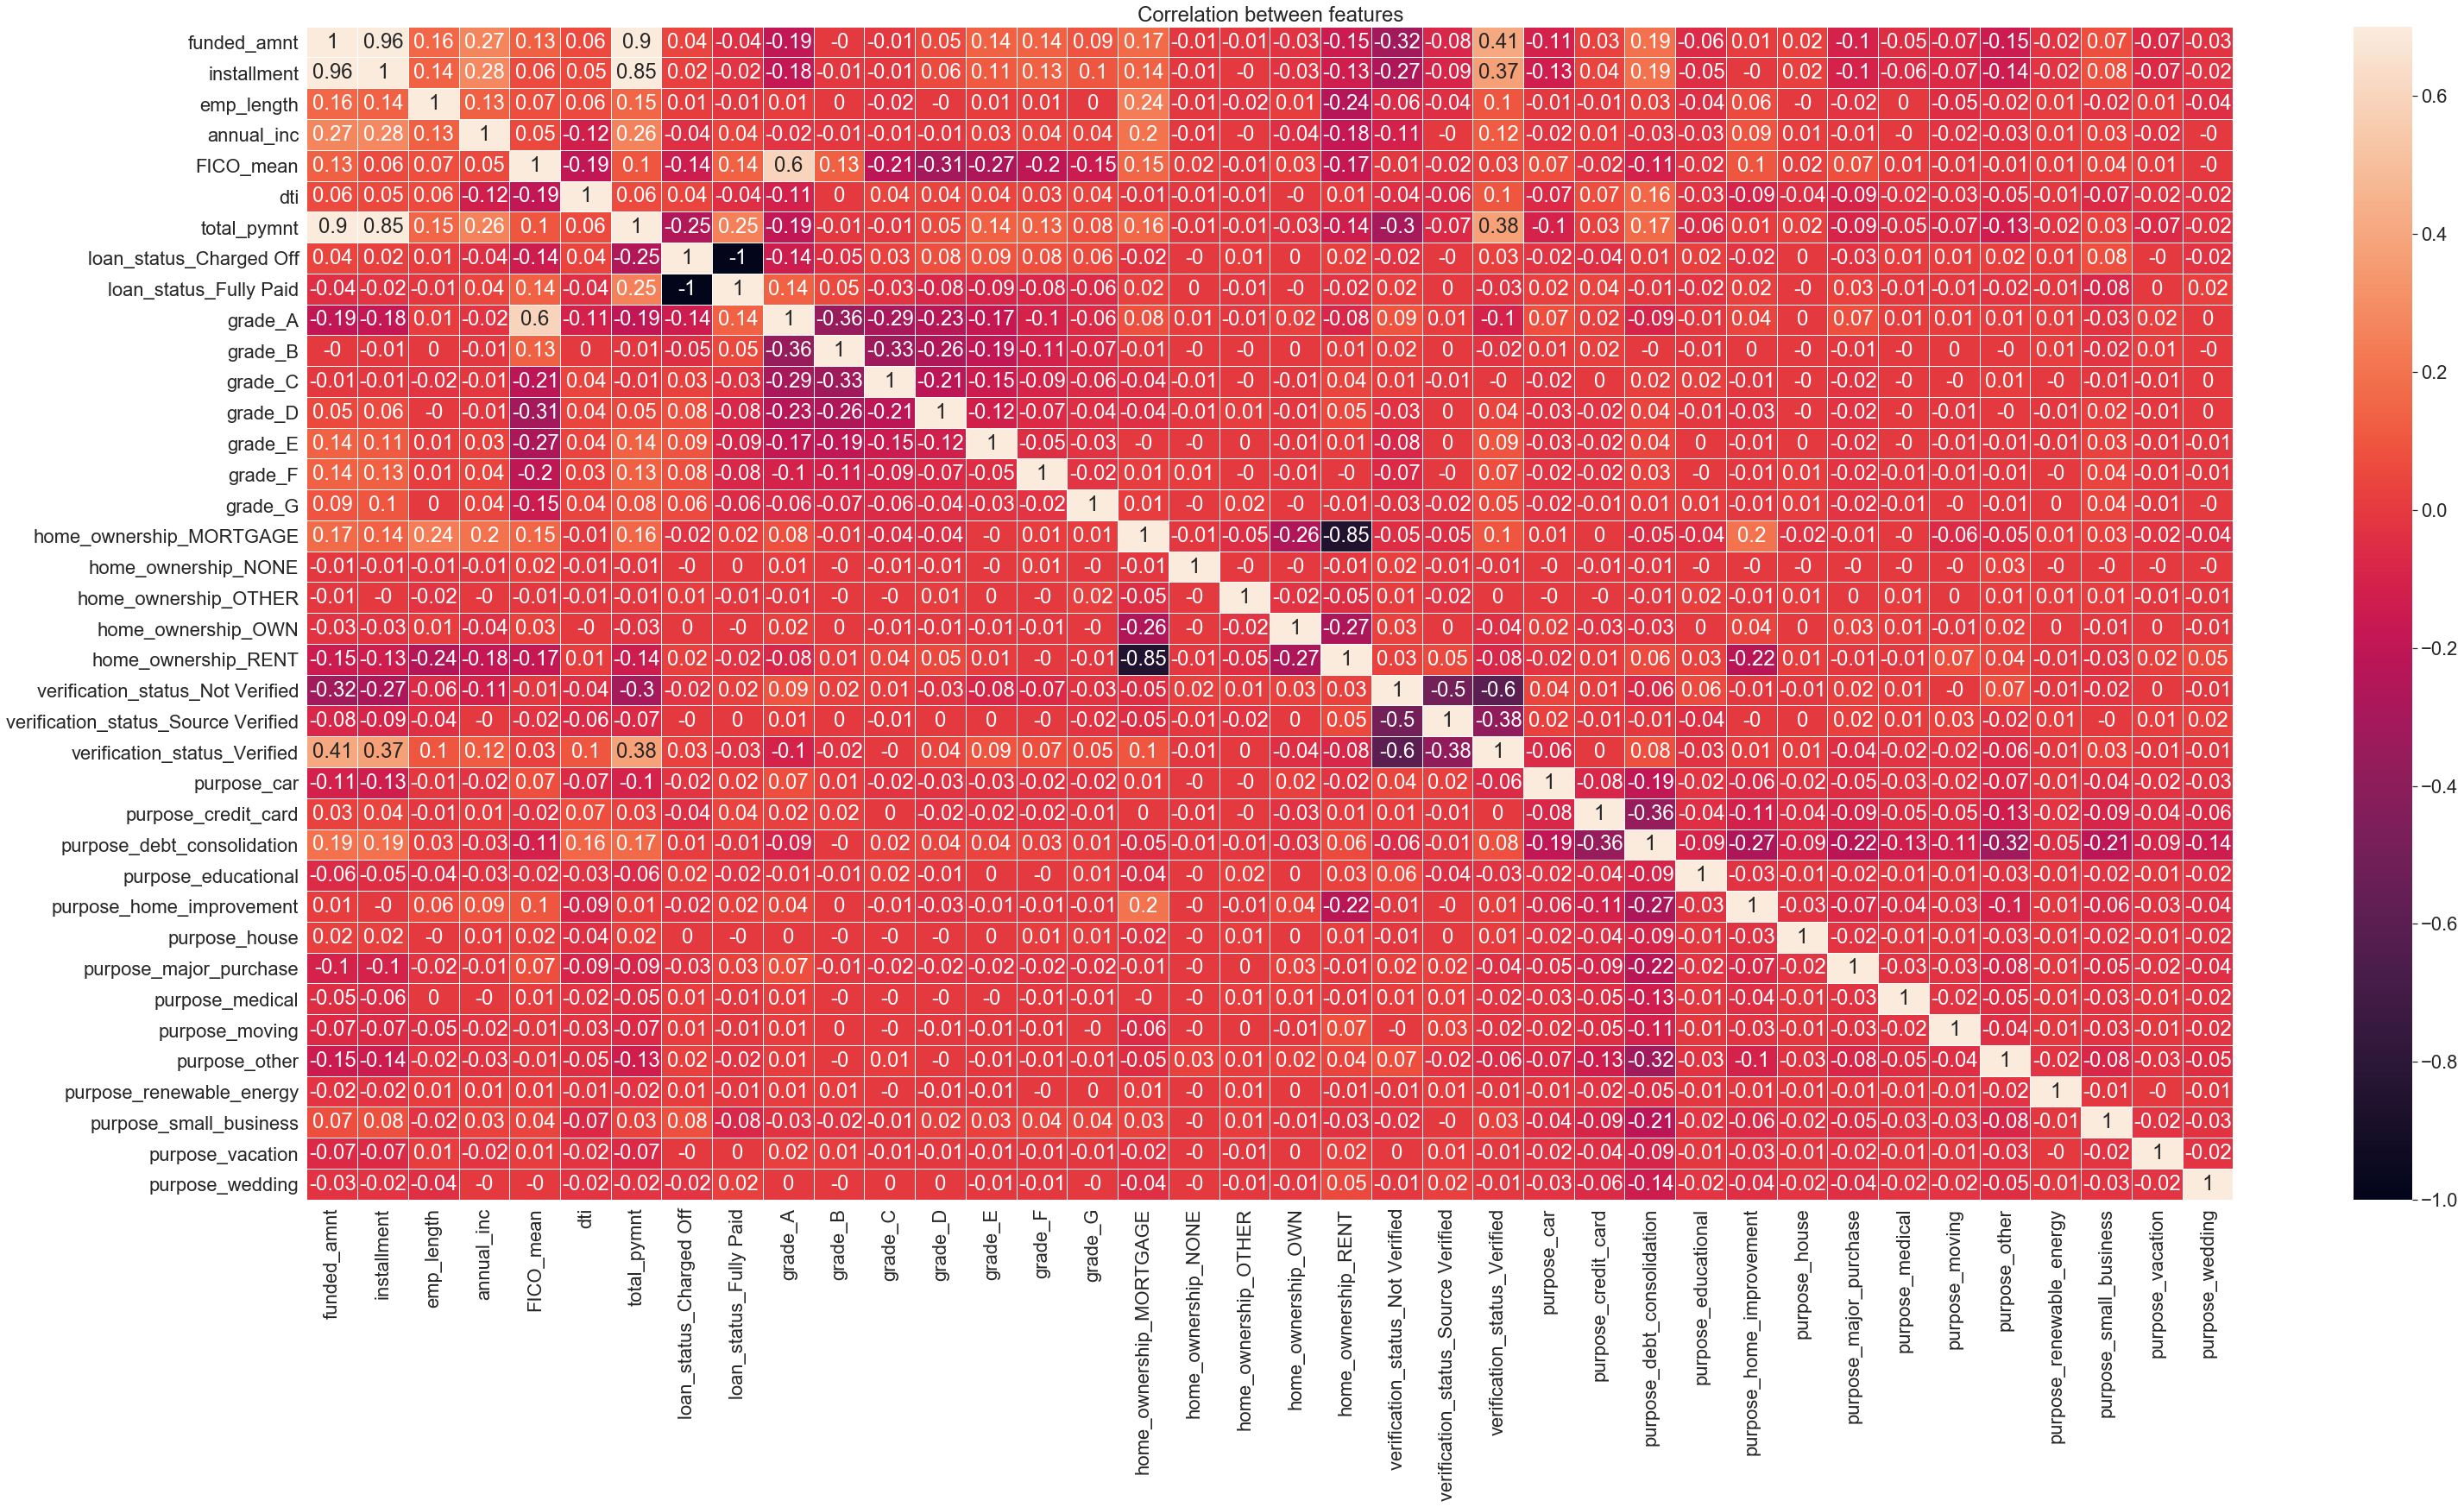

In [397]:
sns.set(font_scale= 2)
plt.figure(figsize=(50, 25))

sns.heatmap(corr_top, vmax=.7, linewidths=0.01,
            annot=True, linecolor="white")
plt.title('Correlation between features')

Still no pattern. I'm going to plot some features against each other. 

### 1. How the loan amount is related with probability of default.

In [398]:
# I add a counter to the dataframe for future groupping
loans_main['count'] = 1

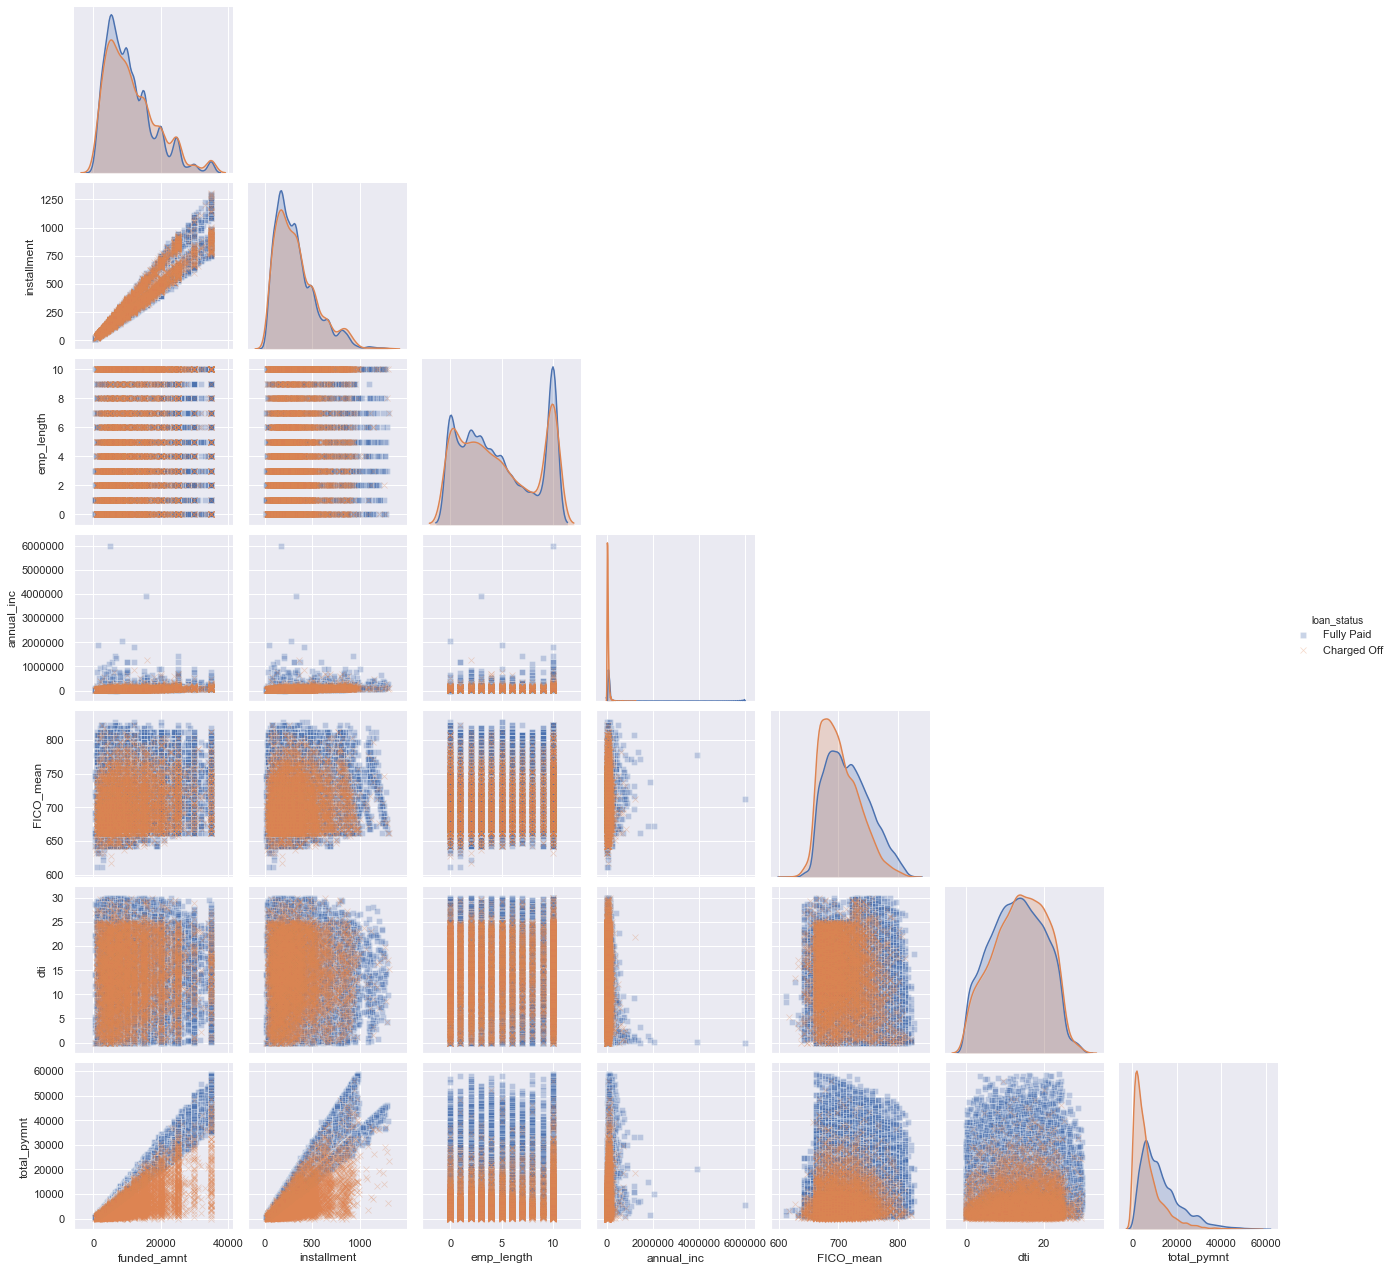

In [399]:
# checking how the loan_status is distributed.
sns.set(font_scale= 1)
sns.pairplot(loans_top, hue = 'loan_status', markers=["s", "x"], plot_kws={'alpha':0.3}, corner = True)

In [400]:
loans_main.groupby('loan_status')['count'].count().reset_index()

loan_status  count
0  Charged Off   6431
1   Fully Paid  36104

(-1.1067718619895408,
 1.1062521727085435,
 -1.1021004669773646,
 1.105368130676983)

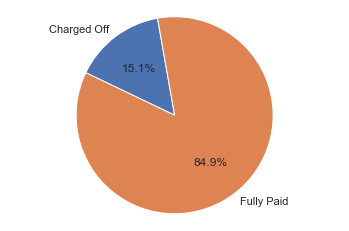

In [401]:
loans_count = loans_main.loan_status.count()
charge_off_counts = (loans_main.loan_status == 'Charged Off').sum()
fully_paid_counts = (loans_main.loan_status == 'Fully Paid').sum()

sns.set(font_scale= 1)
labels = ['Charged Off', 'Fully Paid']
sizes = [charge_off_counts, fully_paid_counts]
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', startangle=100)

plt.axis('equal')

We can see that the vast majority of loans (85%) were Fully Paid. Let's check how funded amount is correlated with the probability of loan being charged off.

In [402]:
# checking the distribution of funded_amnt column values.
loans_main.funded_amnt.describe().reset_index()

index   funded_amnt
0  count  42535.000000
1   mean  10821.585753
2    std   7146.914675
3    min    500.000000
4    25%   5000.000000
5    50%   9600.000000
6    75%  15000.000000
7    max  35000.000000

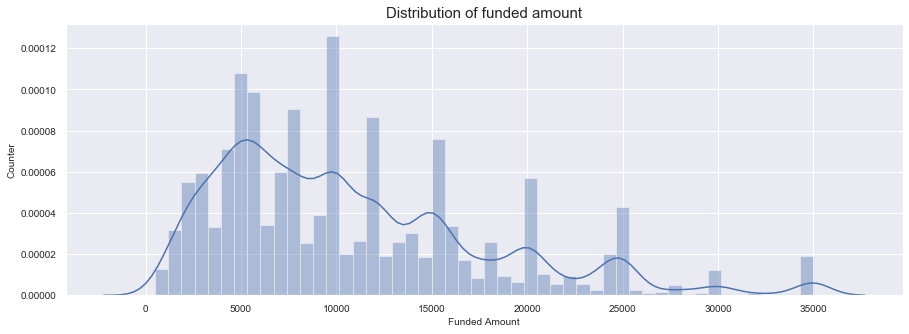

In [403]:
#distplot
f, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.distplot(loans_main.funded_amnt)
ax.set_xlabel('Funded Amount', fontsize=10)
ax.set_ylabel('Counter', fontsize=10)
ax.set_title('Distribution of funded amount', fontsize=15)
ax.tick_params(labelsize=10)


In [404]:
# skewness is greater than 1, so the distribution is highly skewed
loans_main.funded_amnt.skew()

1.085767060608059

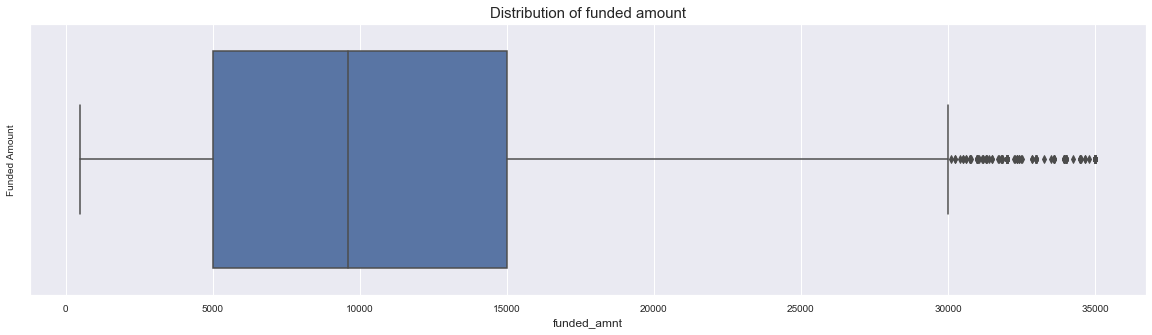

In [405]:
f, ax1 = plt.subplots(1, 1, figsize = (20, 5))
sns.boxplot(x='funded_amnt',data=loans_main,orient='h',ax=ax1)
ax1.set_ylabel('Funded Amount', fontsize=10)
ax1.set_title('Distribution of funded amount', fontsize=15)
ax1.tick_params(labelsize=10)

It looks like we have some significant number of outliers. I'm going to check what they are.

In [406]:
import scipy.stats as stats
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

In [407]:
# I'm looking at outliers
interquartile_amnt_range = iqr(loans_main.funded_amnt)
funded_amnt_range = max(loans_main.funded_amnt) - min(loans_main.funded_amnt)
funded_amnt_outliers = loans_main[((loans_main.funded_amnt - loans_main.funded_amnt.mean()) / loans_main.funded_amnt.std()).abs() >3]
print('Number of outliers in funded amount:' +str(funded_amnt_outliers['funded_amnt'].count()))
print("The range of the dataset is "+str(funded_amnt_range))
print("The interquartile (IQR) of the dataset is "+str(interquartile_amnt_range))

Number of outliers in funded amount:618
The range of the dataset is 34500.0
The interquartile (IQR) of the dataset is 10000.0


In [408]:
# I'm checking the outliers. We have 618 of them with the highest loans amounts.
funded_amnt_outliers.groupby('loan_status')[['funded_amnt','count']].sum().reset_index()

loan_status  funded_amnt  count
0  Charged Off    4850750.0    139
1   Fully Paid   16694025.0    479

(array([  8.,   0.,  14.,   1.,   7.,   0.,  20.,   1.,   7., 560.]),
 array([32275. , 32547.5, 32820. , 33092.5, 33365. , 33637.5, 33910. ,
        34182.5, 34455. , 34727.5, 35000. ]),
 <a list of 10 Patch objects>)

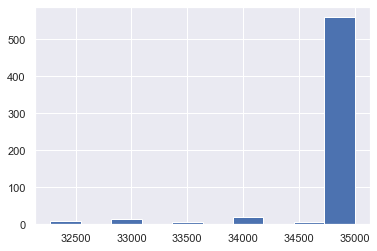

In [409]:
plt.hist(funded_amnt_outliers.funded_amnt)

Although marked as outliers I perceive these amounts as important, but, for further analysis, I'm going to create new column with information which amounts where flagged as outliers 

In [411]:
loans_main['is_amnt_outlier'] = np.where((((loans_main.funded_amnt - loans_main.funded_amnt.mean()) / loans_main.funded_amnt.std()).abs() >3), 1, 0)
loans_main.is_amnt_outlier.nunique()

2

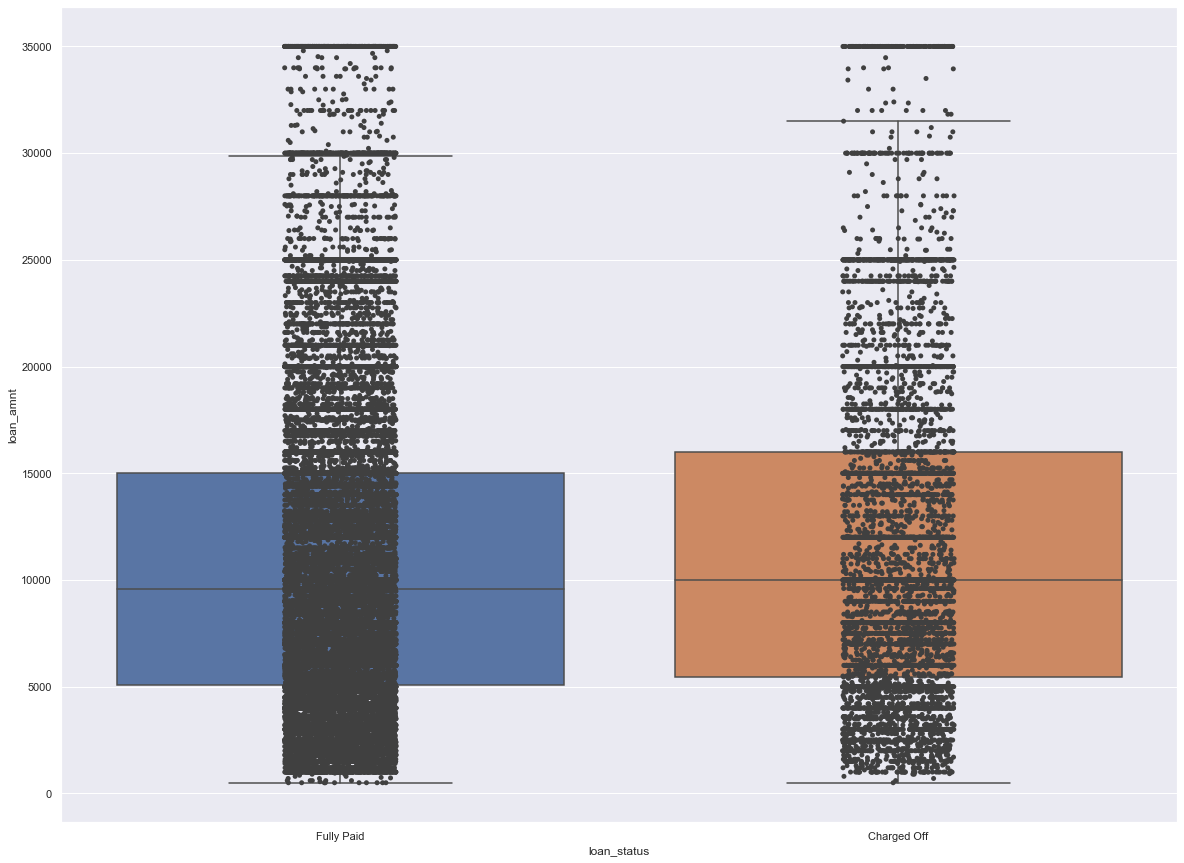

In [412]:
f, ax1 = plt.subplots(1, 1, figsize = (20, 15))
ax = sns.boxplot(x="loan_status", y="loan_amnt", data=loans_main, showfliers = False)
ax = sns.stripplot(x="loan_status", y="loan_amnt", data=loans_main, color=".25")

I'm going to test first hipotesis, that there is no corelation between funded amount and loan status. To achive that I need to group loans amount in few bins between 500 and 35000. I'll divide them into quanitiles.

In [413]:
loans_main['amount_bins'] = pd.qcut(loans_main['funded_amnt'], 10) #labels = list('ABCDEFGHIJ'))

In [414]:
amount_bins = pd.value_counts(loans_main.amount_bins).reset_index()
amount_bins.rename(columns = {'index': 'bins', 'amount_bins': 'total'}, inplace = True)
amount_bins

bins  total
0    (3000.0, 5000.0]   6305
1  (13200.0, 16000.0]   4789
2    (7500.0, 9600.0]   4454
3   (499.999, 3000.0]   4344
4  (20400.0, 35000.0]   4250
5   (9600.0, 11000.0]   4125
6  (11000.0, 13200.0]   4080
7  (16000.0, 20400.0]   3673
8    (6000.0, 7500.0]   3368
9    (5000.0, 6000.0]   3147

In [415]:
# checking how many paid pr unpaid loans are in each bin
loans_paid_unpaid = loans_main.groupby(['loan_status','amount_bins'])['count'].count().reset_index()
loans_paid_unpaid_pivoted = loans_paid_unpaid.pivot(index = 'amount_bins', columns = 'loan_status', values = 'count')
loans_paid_unpaid_pivoted

loan_status         Charged Off  Fully Paid
amount_bins                                
(499.999, 3000.0]           662        3682
(3000.0, 5000.0]            918        5387
(5000.0, 6000.0]            396        2751
(6000.0, 7500.0]            449        2919
(7500.0, 9600.0]            654        3800
(9600.0, 11000.0]           578        3547
(11000.0, 13200.0]          572        3508
(13200.0, 16000.0]          742        4047
(16000.0, 20400.0]          640        3033
(20400.0, 35000.0]          820        3430

In [416]:
# counting the percentage of paid loans in each bin
loans_paid_unpaid_pivoted['Fully_Paid_perc'] = round(loans_paid_unpaid_pivoted['Fully Paid']/(loans_paid_unpaid_pivoted['Fully Paid'] + loans_paid_unpaid_pivoted['Charged Off'])*100, 2)
loans_paid_unpaid_pivoted = loans_paid_unpaid_pivoted.reset_index()

In [417]:
loans_paid_unpaid_pivoted

loan_status         amount_bins  Charged Off  Fully Paid  Fully_Paid_perc
0             (499.999, 3000.0]          662        3682            84.76
1              (3000.0, 5000.0]          918        5387            85.44
2              (5000.0, 6000.0]          396        2751            87.42
3              (6000.0, 7500.0]          449        2919            86.67
4              (7500.0, 9600.0]          654        3800            85.32
5             (9600.0, 11000.0]          578        3547            85.99
6            (11000.0, 13200.0]          572        3508            85.98
7            (13200.0, 16000.0]          742        4047            84.51
8            (16000.0, 20400.0]          640        3033            82.58
9            (20400.0, 35000.0]          820        3430            80.71

In [418]:
print('The lowest probability is ' + str(loans_paid_unpaid_pivoted['Fully_Paid_perc'].min()) + ' for 20400-35000$ bin')
print('The higest probability is ' + str(loans_paid_unpaid_pivoted['Fully_Paid_perc'].max()) + ' for 5000-6000$ bin')

The lowest probability is 80.71 for 20400-35000$ bin
The higest probability is 87.42 for 5000-6000$ bin


Text(0, 0.5, 'Percentage of paid loans')

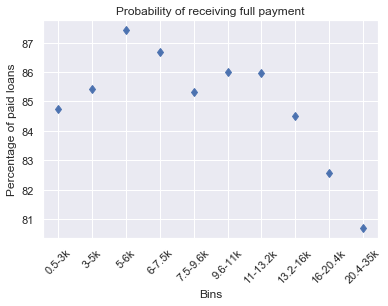

In [419]:
bins = loans_paid_unpaid_pivoted.amount_bins
FP_percentage = loans_paid_unpaid_pivoted['Fully_Paid_perc']
bins_names = ['0.5-3k', '3-5k', '5-6k', '6-7.5k', '7.5-9.6k', '9.6-11k', '11-13.2k', '13.2-16k', '16-20.4k', '20.4-35k']
ax = plt.subplot()
plt.plot(bins, FP_percentage, 'd')
ax.set_xticks(range(10))
ax.set_xticklabels(bins_names, rotation = 45)
plt.title('Probability of receiving full payment')
plt.xlabel('Bins')
plt.ylabel('Percentage of paid loans')

As we can observe the highest probability (nearly 87,5%) of paying full loan amount occurs for loans between 5000  and 7500 USD. What I perceive as very interesting for amounts round 12 thousands the probability of paymant decreases rapidly and reaches the lowest outcomes (barely 81%) with loans for 35000 USD. Still the range isn't that huge, barely 7% between 80.71 and 87.42.

I'm checking the hypothesis (that is quite obvious after looking into above percentage column) that in all bins, means  for probability of paying full amount (85%), are not equal.

Now I'm going to conduct the Chi Square Test to answer the question if I can reject the zero hipothesis that loan's amount doesn't infuences probability of paying it back.

In [420]:
obs = np.array([[loans_paid_unpaid_pivoted['Fully Paid']], [loans_paid_unpaid_pivoted['Charged Off']]])
chi2, pval, dof, ex = chi2_contingency(obs)
pval

4.439961733147845e-19

Here, as we can observe, p-value is very low, much below 5%, therefore we can reject the above hipothesis and confirm that there is a conection between probability of paying back full amount and its hight.

In [421]:
pd.crosstab(loans_main['loan_status'], loans_main['verification_status'])

verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                  2655             1534      2242
Fully Paid                  16103             8772     11229

### 2. How FICO score is connected with probability of loan's to be pay back

In [422]:
# let's look at the data
loans_main.FICO_mean.describe().reset_index()

index     FICO_mean
0  count  42535.000000
1   mean    715.052545
2    std     36.188439
3    min    612.000000
4    25%    687.000000
5    50%    712.000000
6    75%    742.000000
7    max    827.000000

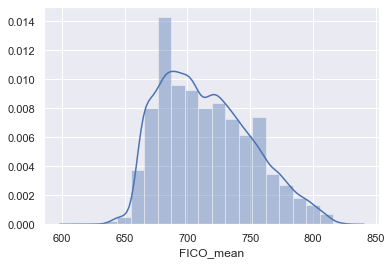

In [423]:
# checking the distribution
sns.set(font_scale= 1)
sns.distplot(loans_main.FICO_mean, bins = 20)

In [424]:
# the distribution is approximately symmetric, skewness is less then 0.5, .
loans_main.FICO_mean.skew()

0.46487125935181534

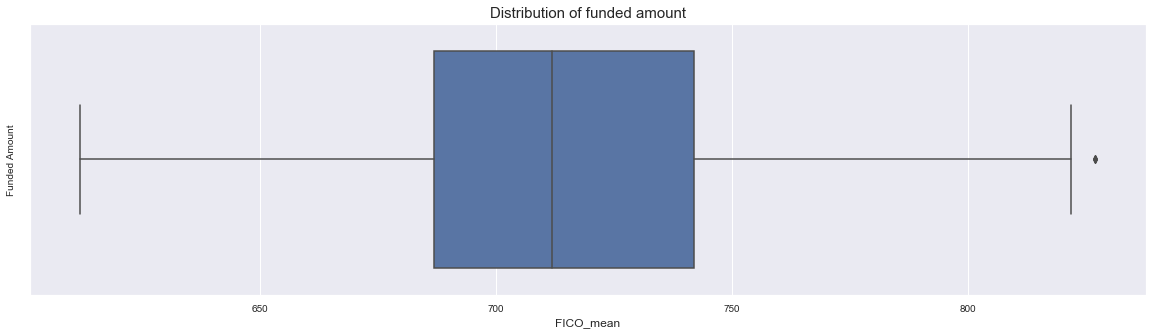

In [425]:
f, ax = plt.subplots(1, 1, figsize = (20, 5))
sns.boxplot(x='FICO_mean',data=loans_main,orient='h',ax=ax)
ax.set_ylabel('Funded Amount', fontsize=10)
ax.set_title('Distribution of funded amount', fontsize=15)
ax.tick_params(labelsize=10)

In [426]:
# I'm checking the outliers
interquartile_FICO_range = iqr(loans_main.FICO_mean)
FICO_mean_range = max(loans_main.FICO_mean) - min(loans_main.FICO_mean)
FICO_mean_outliers = loans_main[((loans_main.FICO_mean - loans_main.FICO_mean.mean()) / loans_main.FICO_mean.std()).abs() >3]
print('Number of outliers in FICO score:' +str(FICO_mean_outliers['FICO_mean'].count()))
print("The range of the dataset is "+str(FICO_mean_range))
print("The interquartile (IQR) of the dataset is "+str(interquartile_FICO_range))

Number of outliers in FICO score:3
The range of the dataset is 215.0
The interquartile (IQR) of the dataset is 55.0


In [427]:
# I'm checking the outliers. We have only 3 of them with the highest FICO scores. 
# They are all Fully Paid, I'm leaving them as they are. 
FICO_mean_outliers

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
5978     20000.0      20000.0         19975.00    60     11.71       441.97   
7017      6425.0       6425.0          6425.00    36      6.03       195.55   
38195    20000.0      12000.0          4929.81    36     10.51       390.09   

      grade sub_grade  emp_length home_ownership  annual_inc  \
5978      B        B3           0            OWN     40000.0   
7017      A        A1           5       MORTGAGE    113000.0   
38195     B        B2           5       MORTGAGE    150000.0   

      verification_status    issue_d             purpose addr_state    dti  \
5978      Source Verified 2011-10-01  debt_consolidation         IL  18.33   
7017         Not Verified 2011-09-01      major_purchase         FL   4.09   
38195     Source Verified 2008-12-01    home_improvement         CA   2.92   

       delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
5978           0.0       1976-09-01           825.0            829.0   
7017           0.0       1970-11-01           825.0            829.0   
38195          0.0       1984-11-01           825.0            829.0   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
5978              0.0                     NaN                     NaN   
7017              0.0                     NaN                     NaN   
38195             0.0                     NaN                     NaN   

       open_acc  pub_rec  revol_bal  revol_util  total_acc  total_pymnt  \
5978        7.0      0.0     2376.0         3.6       23.0     20195.75   
7017        6.0      0.0     1512.0         6.7       28.0      7039.73   
38195       9.0      0.0    84236.0         4.6       23.0     13678.44   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
5978          20170.50          20000.0         195.75                 0.0   
7017           7039.73           6425.0         614.73                 0.0   
38195          5433.37          12000.0        1678.44                 0.0   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
5978          0.0                      0.0   2011-11-01         20196.40   
7017          0.0                      0.0   2014-10-01           199.49   
38195         0.0                      0.0   2010-10-01          5380.05   

      last_credit_pull_d  last_fico_range_high  last_fico_range_low  \
5978          2011-11-01                 659.0                655.0   
7017          2014-10-01                 829.0                825.0   
38195         2010-10-01                 784.0                780.0   

       acc_now_delinq  delinq_amnt  pub_rec_bankruptcies  tax_liens  \
5978              0.0          0.0                   0.0        0.0   
7017              0.0          0.0                   0.0        0.0   
38195             0.0          0.0                   0.0        0.0   

      loan_status  policy_code  FICO_mean  count  is_amnt_outlier  \
5978   Fully Paid            1      827.0      1                0   
7017   Fully Paid            1      827.0      1                0   
38195  Fully Paid            1      827.0      1                0   

              amount_bins  
5978   (16000.0, 20400.0]  
7017     (6000.0, 7500.0]  
38195  (11000.0, 13200.0]

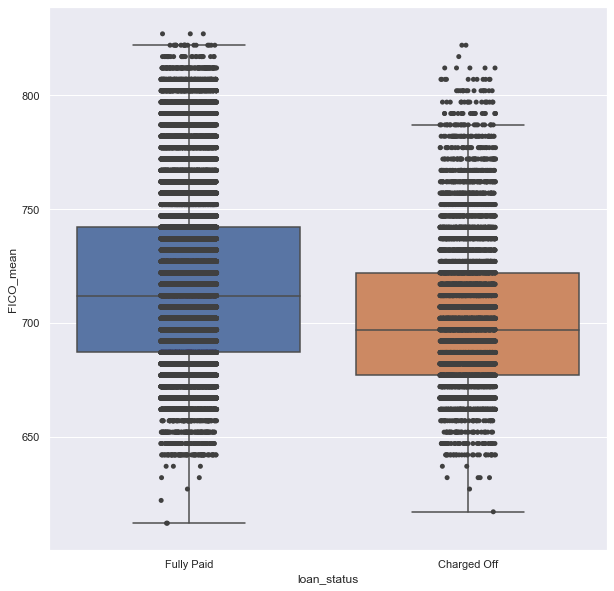

In [428]:
f, ax = plt.subplots(figsize = (10, 10))
ax = sns.boxplot(x="loan_status", y="FICO_mean", data=loans_main, showfliers = False)
ax = sns.stripplot(x="loan_status", y="FICO_mean", data=loans_main, color=".25")

In [429]:
# There is a slight, visible difference in IRQ and mean for FICO scores between paid and unpaid loans. 
# I'm going to check it in numbers.
FICO_ChO_descr = loans_main.loc[loans_main.loan_status == 'Charged Off', 'FICO_mean'].describe().reset_index()
FICO_ChO_descr = FICO_ChO_descr.rename(columns={'FICO_mean': 'Charged_Off_descr'})
FICO_FP_descr = loans_main.loc[loans_main.loan_status == 'Fully Paid', 'FICO_mean'].describe().reset_index()
FICO_FP_descr = FICO_FP_descr.rename(columns={'FICO_mean': 'Fully_Paid_descr'})
FICO_describe = FICO_ChO_descr.merge(FICO_FP_descr, how = 'left', on = 'index')
FICO_describe

index  Charged_Off_descr  Fully_Paid_descr
0  count        6431.000000      36104.000000
1   mean         702.883999        717.220059
2    std          32.152072         36.437532
3    min         617.000000        612.000000
4    25%         677.000000        687.000000
5    50%         697.000000        712.000000
6    75%         722.000000        742.000000
7    max         822.000000        827.000000

In [430]:
range_FICO_ChO = loans_main.loc[loans_main.loan_status == 'Charged Off', 'FICO_mean'].max()-loans_main.loc[loans_main.loan_status == 'Charged Off', 'FICO_mean'].min()
range_FICO_FP = loans_main.loc[loans_main.loan_status == 'Fully Paid', 'FICO_mean'].max()-loans_main.loc[loans_main.loan_status == 'Fully Paid', 'FICO_mean'].min()


In [431]:
print('The IQR for Fully Paid loans is '+(str(iqr(FICO_describe.Fully_Paid_descr)))+' FICO points')
print('The range for Fully Paid loans is '+str(range_FICO_FP)+' FICO points')
print('The IQR for Charged Off loans is '+(str(iqr(FICO_describe.Charged_Off_descr)))+' FICO points')
print('The range for Charged Off loans is '+str(range_FICO_ChO)+' FICO points')
print('There is ' +(str(iqr(FICO_describe.Fully_Paid_descr)-iqr(FICO_describe.Charged_Off_descr)))+ ' points difference')

The IQR for Fully Paid loans is 95.0 FICO points
The range for Fully Paid loans is 215.0 FICO points
The IQR for Charged Off loans is 85.0 FICO points
The range for Charged Off loans is 205.0 FICO points
There is 10.0 points difference


I don't perceive these differences as significant. We can notice that range for paid bills is exactly same as for whole values in FICO_mean and a little smaller in Fully Paid. Median is very close for both cases what means that distribution is symetric. There are much more poins shown as outliers in Charged Off part. 
We can make a zero hipothesis that there is no difference  between borrowers with lower FICO and higher FICO.

I'm going to add a column with FICO scoring group to see which bin the FICO values fit in.

In [432]:
scores = ["Poor", "Fair", "Good", "Very Good", "Exeptional"]
loans_main['FICO_group'] = pd.cut(loans_main['FICO_mean'], [350, 580, 670, 740, 800, 850], labels = scores)
FICO_total = pd.value_counts(loans_main.FICO_group).reset_index()
FICO_total = FICO_total.rename(columns={'index': 'FICO_group', 'FICO_group': 'total'})
FICO_total

FICO_group  total
0        Good  27846
1   Very Good  10171
2        Fair   3894
3  Exeptional    624
4        Poor      0

In [433]:
# let's see how they divide for paid and unpaid
FICO_paid_unpaid = pd.crosstab(loans_main['FICO_group'], loans_main['loan_status']).reset_index()
FICO_paid_unpaid

loan_status  FICO_group  Charged Off  Fully Paid
0                  Fair          964        2930
1                  Good         4550       23296
2             Very Good          883        9288
3            Exeptional           34         590

In [434]:
FICO_merged = FICO_paid_unpaid.merge(FICO_total, how = 'left', on = 'FICO_group')
FICO_merged

FICO_group  Charged Off  Fully Paid  total
0        Fair          964        2930   3894
1        Good         4550       23296  27846
2   Very Good          883        9288  10171
3  Exeptional           34         590    624

In [435]:
FICO_merged['Fully_Paid_perc'] = round(FICO_merged['Fully Paid']/(FICO_merged['total'])*100, 2)
FICO_merged

FICO_group  Charged Off  Fully Paid  total  Fully_Paid_perc
0        Fair          964        2930   3894            75.24
1        Good         4550       23296  27846            83.66
2   Very Good          883        9288  10171            91.32
3  Exeptional           34         590    624            94.55

In [436]:
FICO_amnt = loans_main.groupby('FICO_group')['funded_amnt'].sum().reset_index()
FICO_amnt.funded_amnt = FICO_amnt.funded_amnt.apply(lambda x: x/1000000)
FICO_amnt.rename(columns={'funded_amnt' : 'funded_amnt_mln'}, inplace = True )
FICO_amnt

FICO_group  funded_amnt_mln
0        Poor         0.000000
1        Fair        34.417925
2        Good       298.308850
3   Very Good       120.591025
4  Exeptional         6.978350

In [437]:
FICO_final = FICO_merged.merge(FICO_amnt, how = 'inner', on = 'FICO_group')
FICO_final

FICO_group  Charged Off  Fully Paid  total  Fully_Paid_perc  \
0        Fair          964        2930   3894            75.24   
1        Good         4550       23296  27846            83.66   
2   Very Good          883        9288  10171            91.32   
3  Exeptional           34         590    624            94.55   

   funded_amnt_mln  
0        34.417925  
1       298.308850  
2       120.591025  
3         6.978350

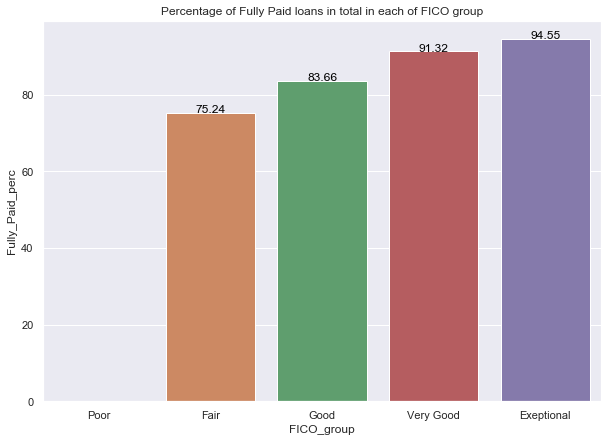

In [438]:
f, ax = plt.subplots(figsize = (10, 7))
plt.ylabel('Percentage')
plt.title('Percentage of Fully Paid loans in total in each of FICO group')
sns.barplot('FICO_group', 'Fully_Paid_perc', data = FICO_final)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=12, color='black', ha='center')

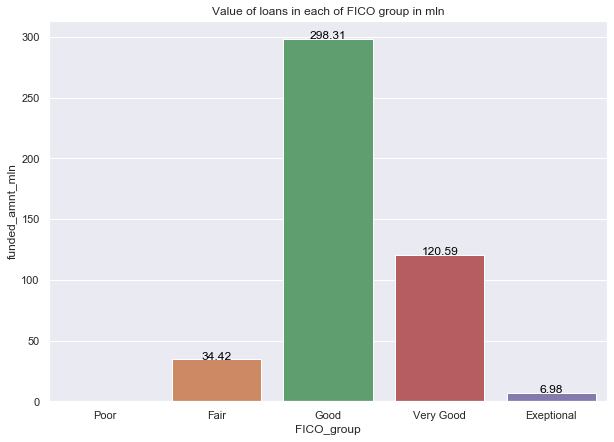

In [439]:
f, ax = plt.subplots(figsize = (10, 7))
plt.ylabel('Percentage')
plt.title('Value of loans in each of FICO group in mln')
sns.barplot('FICO_group', 'funded_amnt_mln', data = FICO_final)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=12, color='black', ha='center')

As we can see, the borrowers with higher FICO scores are more likely to pay off the loan. It's nearly 20 points difference between Fair and Exceptional group. What's also interesting, the value of loans is the highest in "Good" group which has the probability of paying back full amount (83,66%) nearly equal to the average of total of loans (84,9%). The value of that group is nearly 65% of all loans in data set. Therefore we should pay a lot of attention to borrowers from this group.

### 3. How home ownership category is connected with probability of loan's to be paid off

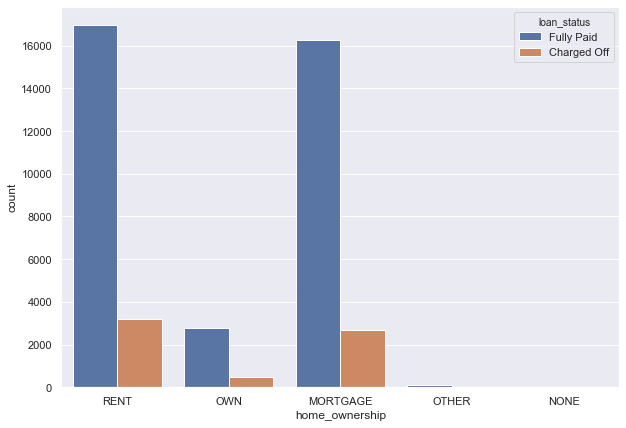

In [440]:
# checking the distribution
f, ax = plt.subplots(figsize = (10, 7))
sns.countplot(loans_main.home_ownership, hue = loans_main.loan_status)

In [441]:
home_ownership = pd.crosstab(loans_main['loan_status'], loans_main['home_ownership']).reset_index()
home_ownership

home_ownership  loan_status  MORTGAGE  NONE  OTHER   OWN   RENT
0               Charged Off      2699     1     29   495   3207
1                Fully Paid     16260     7    107  2756  16974

In [442]:
home_ownership_total = loans_main.groupby(['home_ownership', 'loan_status'])['count'].sum()
home_ownership_total = home_ownership_total.reset_index()
home_ownership_total

home_ownership  loan_status  count
0       MORTGAGE  Charged Off   2699
1       MORTGAGE   Fully Paid  16260
2           NONE  Charged Off      1
3           NONE   Fully Paid      7
4          OTHER  Charged Off     29
5          OTHER   Fully Paid    107
6            OWN  Charged Off    495
7            OWN   Fully Paid   2756
8           RENT  Charged Off   3207
9           RENT   Fully Paid  16974

Zero hypothesis: the mean of paid off loans is same for all sorts of home ownership.

In [443]:
home_ownership_total_piv = home_ownership_total.pivot(index = 'home_ownership', columns = 'loan_status', values = 'count' )
home_ownership_total_piv['total'] = home_ownership_total_piv['Charged Off'] + home_ownership_total_piv['Fully Paid']
home_ownership_total_piv['ho_FP_perc'] = round(home_ownership_total_piv['Fully Paid']/home_ownership_total_piv['total']*100, 2)
home_ownership_total_piv['ho_loan_amnt_mln'] = loans_main.groupby(['home_ownership'])['funded_amnt'].sum()/1000000
home_ownership_total_piv

loan_status     Charged Off  Fully Paid  total  ho_FP_perc  ho_loan_amnt_mln
home_ownership                                                              
MORTGAGE               2699       16260  18959       85.76        231.521600
NONE                      1           7      8       87.50          0.057000
OTHER                    29         107    136       78.68          1.264325
OWN                     495        2756   3251       84.77         32.449775
RENT                   3207       16974  20181       84.11        195.003450

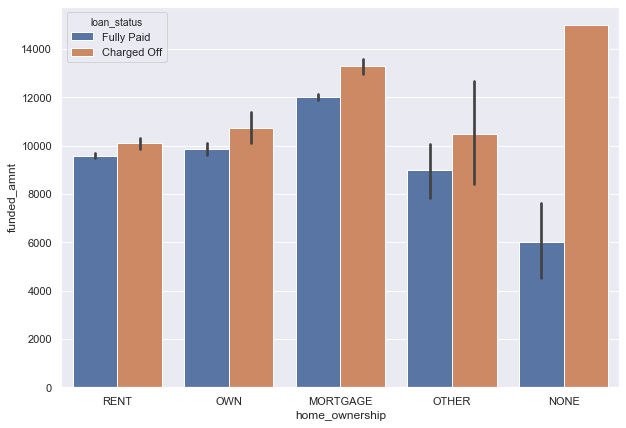

In [444]:
f, ax = plt.subplots(figsize = (10, 7))
sns.barplot(loans_main.home_ownership, loans_main.funded_amnt, hue = loans_main.loan_status)

<BarContainer object of 2 artists>

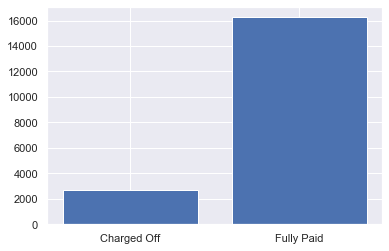

In [445]:
# let's look into the Mortage part closer
plt.bar(home_ownership['loan_status'], home_ownership['MORTGAGE'])

In [446]:
mortage_perc = round(home_ownership.loc[home_ownership.loan_status == 'Fully Paid', 'MORTGAGE'].sum()/home_ownership.MORTGAGE.sum()*100, 2)
print('The probability of paying off the loan among mortage owners is '+str(mortage_perc))

The probability of paying off the loan among mortage owners is 85.76


We can notice that mortage owners are very slightly over the average for whole group (85,76%) of homeownership. I'll check the corelation with funded amount and FICO score

In [447]:
obs_ho = np.array([[home_ownership_total_piv['Fully Paid']], [home_ownership_total_piv['Charged Off']]])
chi2, pval_ho, dof, ex = chi2_contingency(obs_ho)
pval_ho

4.922904146937386e-05

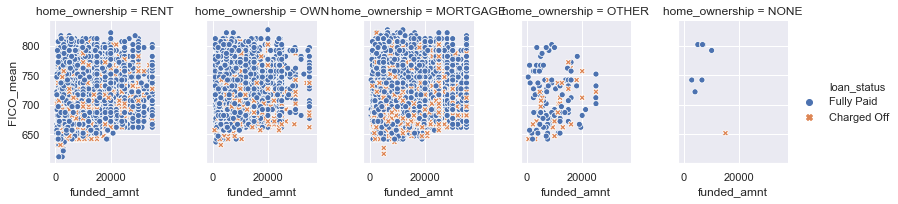

In [448]:
sns.relplot(x="funded_amnt", y="FICO_mean", hue="loan_status", style="loan_status",
            col="home_ownership", col_wrap=5,
            height=3, aspect=.75, data=loans_main)

### 4. How employment length is connected with probability of loan's to be paid off

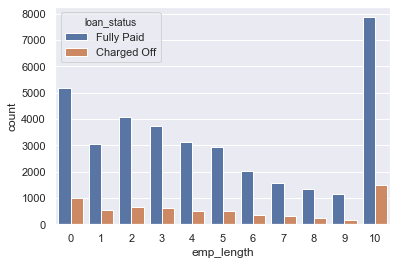

In [449]:
# let's check the distribution
sns.countplot(loans_main.emp_length, hue = loans_main.loan_status)

In [450]:
employer_length = loans_main.groupby(['loan_status', 'emp_length'])['count'].sum()
employer_length = employer_length.reset_index()
employer_length

loan_status  emp_length  count
0   Charged Off           0    996
1   Charged Off           1    551
2   Charged Off           2    654
3   Charged Off           3    630
4   Charged Off           4    522
5   Charged Off           5    509
6   Charged Off           6    352
7   Charged Off           7    295
8   Charged Off           8    238
9   Charged Off           9    180
10  Charged Off          10   1504
11   Fully Paid           0   5178
12   Fully Paid           1   3044
13   Fully Paid           2   4089
14   Fully Paid           3   3734
15   Fully Paid           4   3127
16   Fully Paid           5   2949
17   Fully Paid           6   2023
18   Fully Paid           7   1580
19   Fully Paid           8   1354
20   Fully Paid           9   1161
21   Fully Paid          10   7865

Stawiam hipotezę zerową, że we wszystkich grupach spłacalnosć kredytów jest taka sama

In [451]:
employer_length_total_piv = employer_length.pivot(index= 'emp_length', columns = 'loan_status', values = 'count')
employer_length_total_piv

loan_status  Charged Off  Fully Paid
emp_length                          
0                    996        5178
1                    551        3044
2                    654        4089
3                    630        3734
4                    522        3127
5                    509        2949
6                    352        2023
7                    295        1580
8                    238        1354
9                    180        1161
10                  1504        7865

In [452]:
obs_emp = np.array([[employer_length_total_piv['Fully Paid']], [employer_length_total_piv['Charged Off']]])
stat, pval_emp, dof, expected = chi2_contingency(obs_emp)
pval_emp

0.004282450828644655

P value wyniosło znacznie mniej niż 5%, a więc mogę odrzucić hipotezę zerową.

### 6. How the annual income is connected wit probability of paying back the loan

In [453]:
loans_main.annual_inc.describe()

count    4.253500e+04
mean     6.913005e+04
std      6.409684e+04
min      0.000000e+00
25%      4.000000e+04
50%      5.900000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

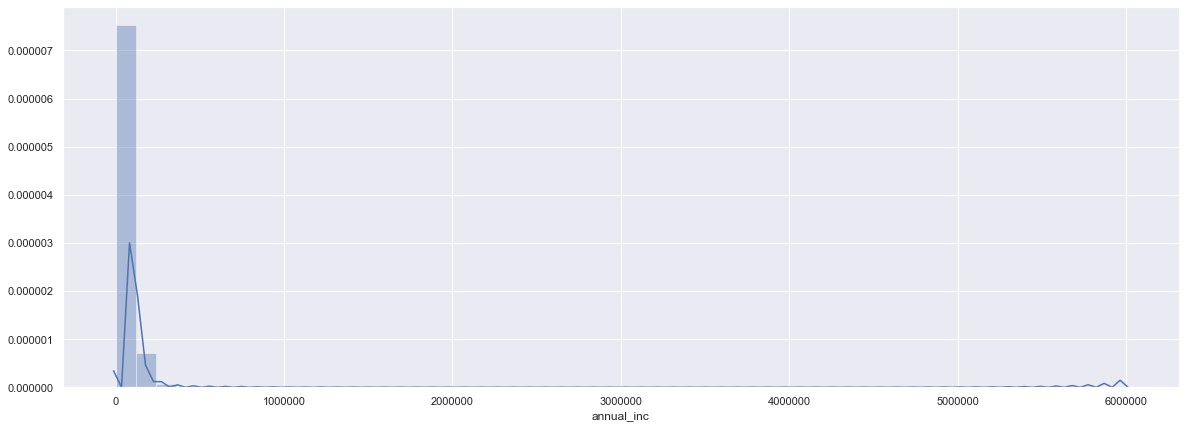

In [454]:
# let's check the ditribution
f, ax = plt.subplots(figsize = (20, 7))
sns.distplot(loans_main.annual_inc)

In [455]:
loans_main.annual_inc.skew()

29.031679481941783

As we can see, the histogram is undoubtly right-skewed and we can' actually see what are the differences in lowest amounts. I'll check the boxplot.

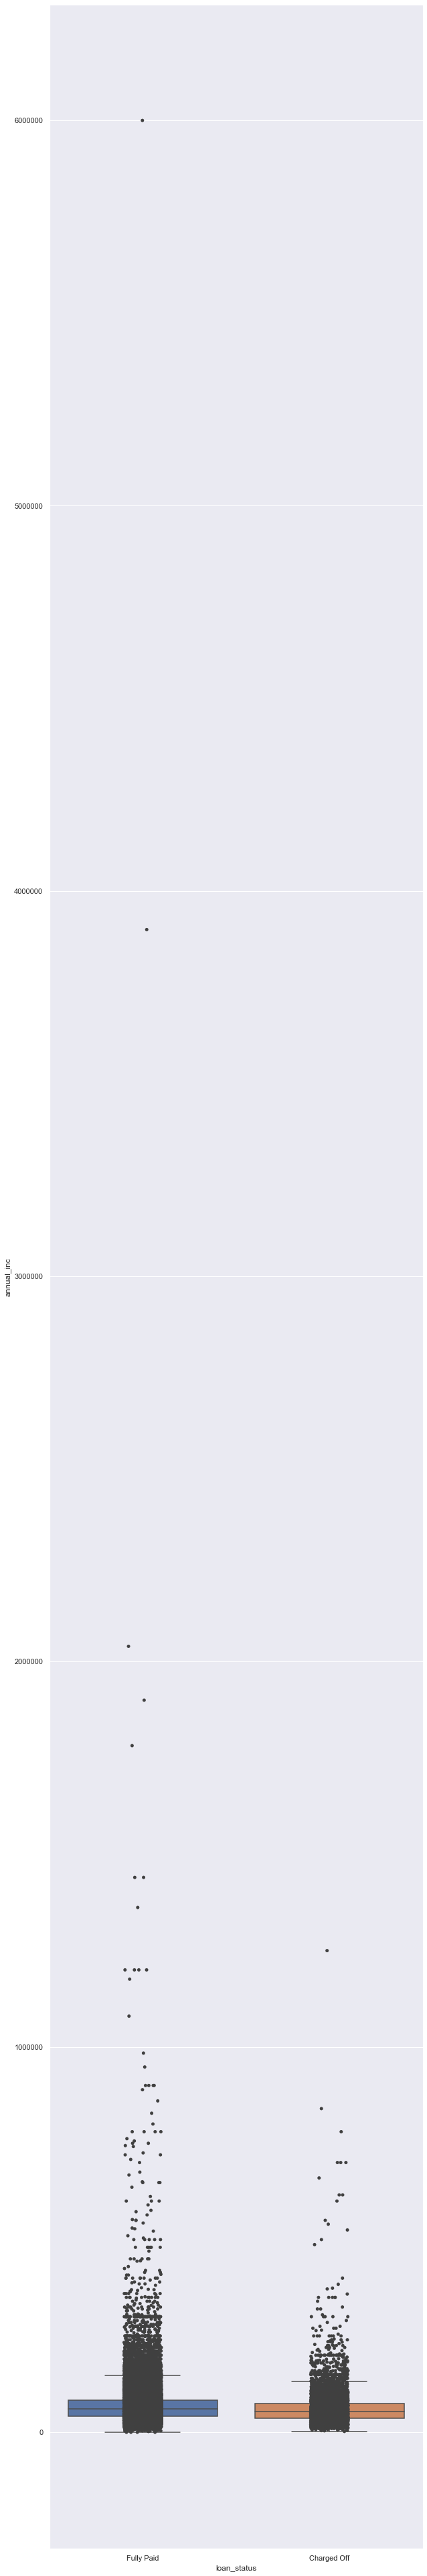

In [456]:
f, ax = plt.subplots(figsize = (10, 70))
ax = sns.boxplot(x="loan_status", y="annual_inc", data=loans_main, showfliers = False)
ax = sns.stripplot(x="loan_status", y="annual_inc", data=loans_main, color=".25")

In [457]:
# I'm checking the outliers
interquartile_annual_inc = iqr(loans_main.annual_inc)
annual_inc_range = max(loans_main.annual_inc) - min(loans_main.annual_inc)
annual_inc_outliers = loans_main[((loans_main.annual_inc - loans_main.annual_inc.mean()) / loans_main.annual_inc.std()).abs() >3]
print('Number of outliers in annual income score:' +str(annual_inc_outliers['annual_inc'].count()))
print("The range of the dataset is "+str(annual_inc_range))
print("The interquartile (IQR) of the dataset is "+str(interquartile_annual_inc))

Number of outliers in annual income score:341
The range of the dataset is 6000000.0
The interquartile (IQR) of the dataset is 42500.0


Outliers start from 2.62 mln and go till 6 mln. And there are 341 of them. Actually they can't be considered as outliers, but highest annual incomes (the wealthiest clients). I'm going to create another column with info about this division and examine closer this group. As we can see we have 2 outliers which are visibly higher then rest of group: 600 mln and 400 mln USD. It can be a human mistake or there are some borrowers who earn that much. Therefore I'm leaving them in the table

In [458]:
annual_inc_outliers.annual_inc.describe().reset_index()

index    annual_inc
0  count  3.410000e+02
1   mean  4.607311e+05
2    std  4.369908e+05
3    min  2.620000e+05
4    25%  3.000000e+05
5    50%  3.251621e+05
6    75%  4.800000e+05
7    max  6.000000e+06

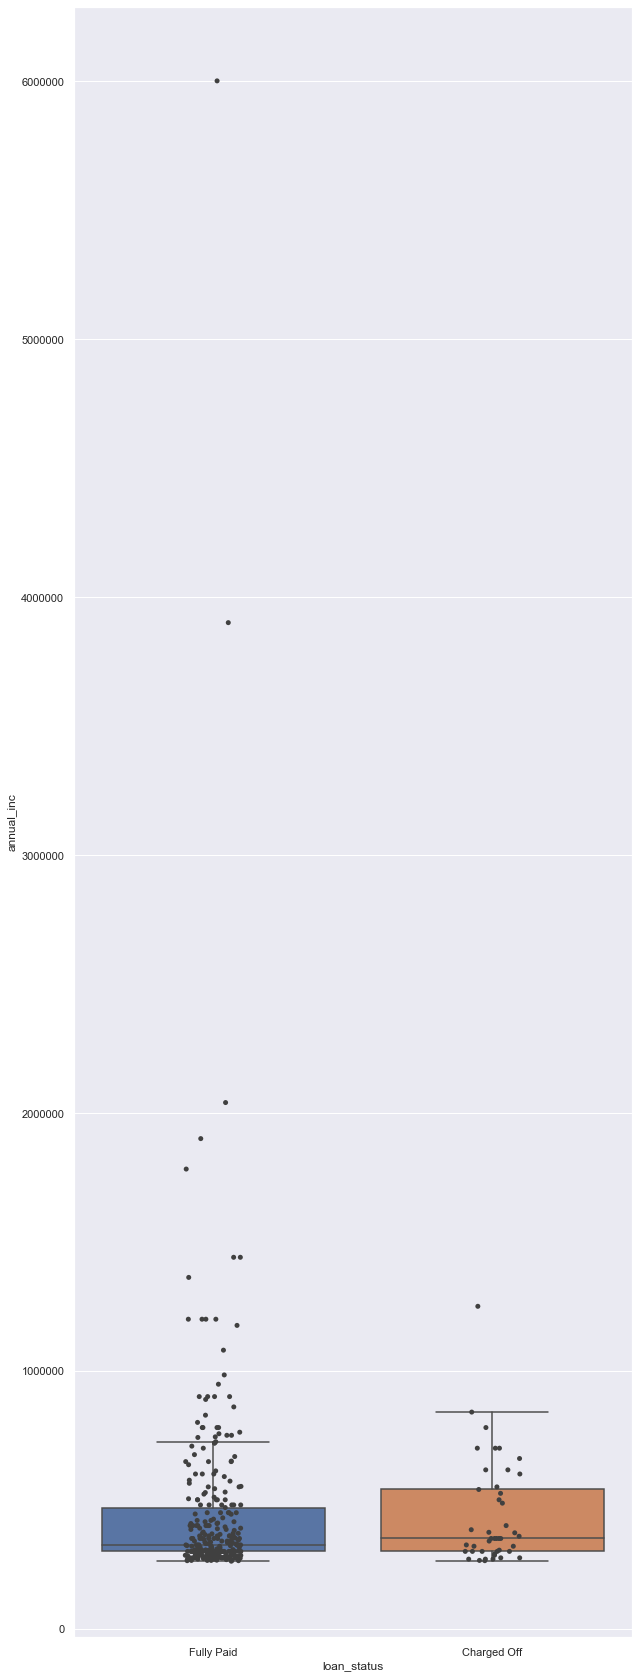

In [459]:
f, ax = plt.subplots(figsize = (10, 30))
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = annual_inc_outliers, showfliers = False)
ax = sns.stripplot(x="loan_status", y="annual_inc", data=annual_inc_outliers, color=".25")

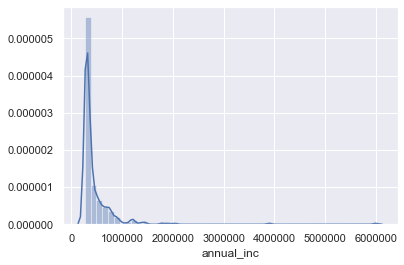

In [460]:
sns.distplot(annual_inc_outliers.annual_inc)

In [461]:
loans_main['is_income_outlier'] = np.where((((loans_main.annual_inc - loans_main.annual_inc.mean()) / loans_main.annual_inc.std()).abs() >3), 1, 0)
loans_main.is_income_outlier.nunique()

2

In [462]:
annual_inc_outliers.annual_inc.skew()

8.001507257352198

In [463]:
annual_inc_no_outliers = loans_main[loans_main.is_income_outlier == 0]
annual_inc_no_outliers.shape

(42194, 52)

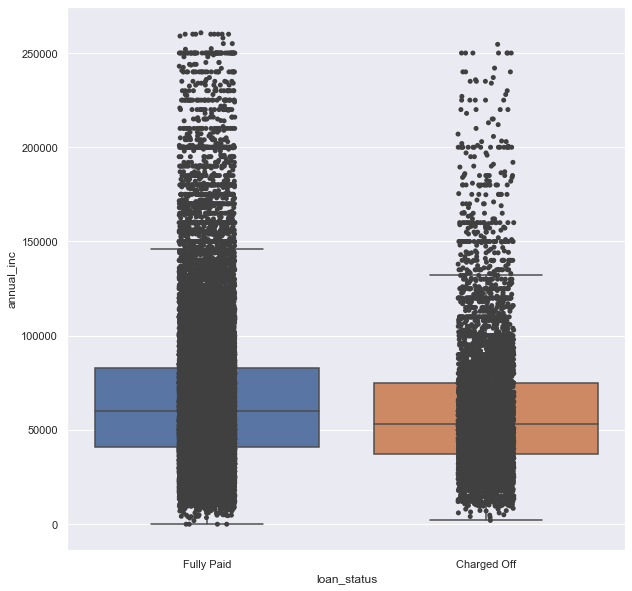

In [464]:
f, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(x = 'loan_status', y = 'annual_inc', data = annual_inc_no_outliers,  showfliers = False)
ax = sns.stripplot(x="loan_status", y="annual_inc", data=annual_inc_no_outliers, color=".25")

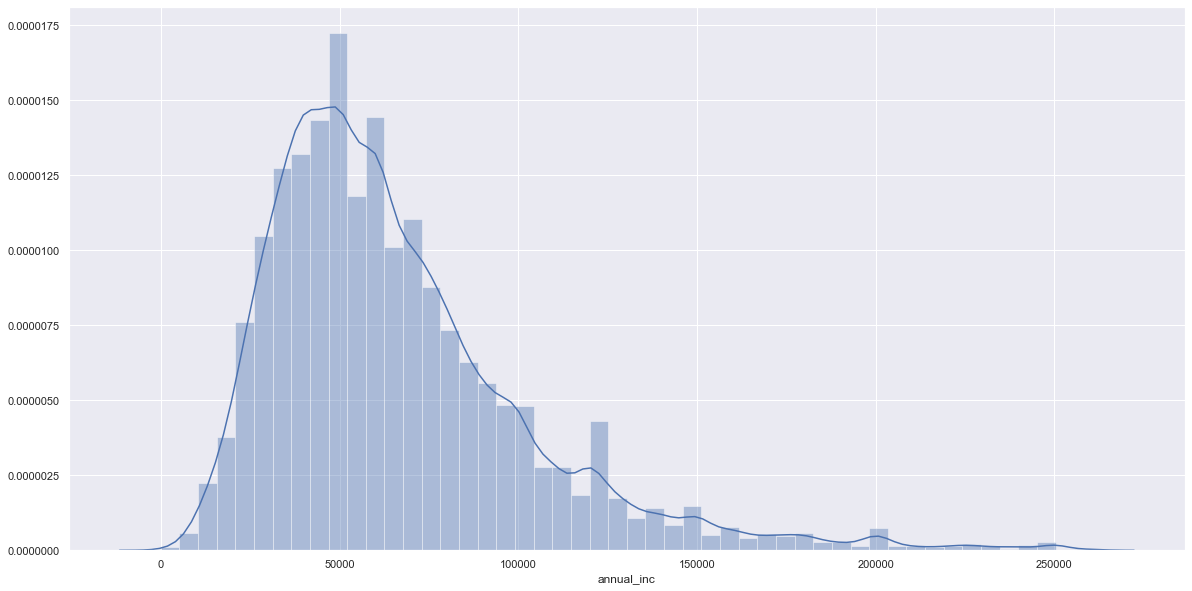

In [465]:
f, ax = plt.subplots(figsize = (20, 10))
sns.distplot(annual_inc_no_outliers.annual_inc)

In [466]:
annual_inc_no_outliers.annual_inc.skew()

1.5516989272611816

I set up zero hypothesis that in that there is no difference in the probability of paying back the loan in a richmen's group and the rest of borrowers.

In [467]:
richer_are_more_solid = loans_main.groupby(['loan_status', 'is_income_outlier'])['count'].count()
richer_are_more_solid = richer_are_more_solid.reset_index()
richer_are_more_solid

loan_status  is_income_outlier  count
0  Charged Off                  0   6387
1  Charged Off                  1     44
2   Fully Paid                  0  35807
3   Fully Paid                  1    297

In [468]:
richer_are_more_solid_piv = richer_are_more_solid.pivot(index = 'is_income_outlier', columns = 'loan_status', values = 'count')
richer_are_more_solid_piv

loan_status        Charged Off  Fully Paid
is_income_outlier                         
0                         6387       35807
1                           44         297

In [469]:
obs_3 = np.array([[richer_are_more_solid_piv['Fully Paid']], [richer_are_more_solid_piv['Charged Off']]])
stat, pval_3, dof, expected = chi2_contingency(obs_3)
pval_3

0.2841448416102075

P value is higher then 5% therefore I cannot reject the hipothesis. I'm going to check this on percentages in both groups.

In [470]:
annual_inc_paid_unpaid_perc = round((annual_inc_outliers['loan_status'].value_counts()/annual_inc_outliers['loan_status'].count()*100), 1)
annual_inc_paid_unpaid_perc.reset_index()

index  loan_status
0   Fully Paid         87.1
1  Charged Off         12.9

In [471]:
annual_inc_paid_unpaid_perc = round((annual_inc_no_outliers['loan_status'].value_counts()/annual_inc_no_outliers['loan_status'].count()*100), 1)
annual_inc_paid_unpaid_perc.reset_index()

index  loan_status
0   Fully Paid         84.9
1  Charged Off         15.1

As we can see, there is a slight difference between groups, but it can not be perceived as signifiant though.

### 6. How the credit history is connected with probability of paying off the loan

In [472]:
loans_main.earliest_cr_line.describe()

count                   42535
unique                    530
top       1999-10-01 00:00:00
freq                      393
first     1946-01-01 00:00:00
last      2008-11-01 00:00:00
Name: earliest_cr_line, dtype: object

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.100e+01, 1.500e+01, 1.000e+01, 1.600e+01, 2.700e+01,
        4.300e+01, 6.400e+01, 5.600e+01, 8.200e+01, 9.100e+01, 1.090e+02,
        1.530e+02, 1.990e+02, 2.210e+02, 2.360e+02, 2.750e+02, 3.650e+02,
        5.490e+02, 6.020e+02, 7.350e+02, 9.270e+02, 1.133e+03, 1.388e+03,
        1.333e+03, 1.803e+03, 2.771e+03, 2.808e+03, 2.962e+03, 3.668e+03,
        4.208e+03, 3.974e+03, 2.824e+03, 2.652e+03, 2.409e+03, 1.918e+03,
        1.476e+03, 4.130e+02]),
 array([710397., 710856., 711315., 711774., 712233., 712692., 713151.,
        713610., 714069., 714528., 714987., 715446., 715905., 716364.,
        716823., 717282., 717741., 718200., 718659., 719118., 719577.,
        720036., 720495., 720954., 721413., 721872., 722331., 722790.,
        723249., 723708., 724167., 724626., 725085., 725544., 726003.,
        726462., 7269

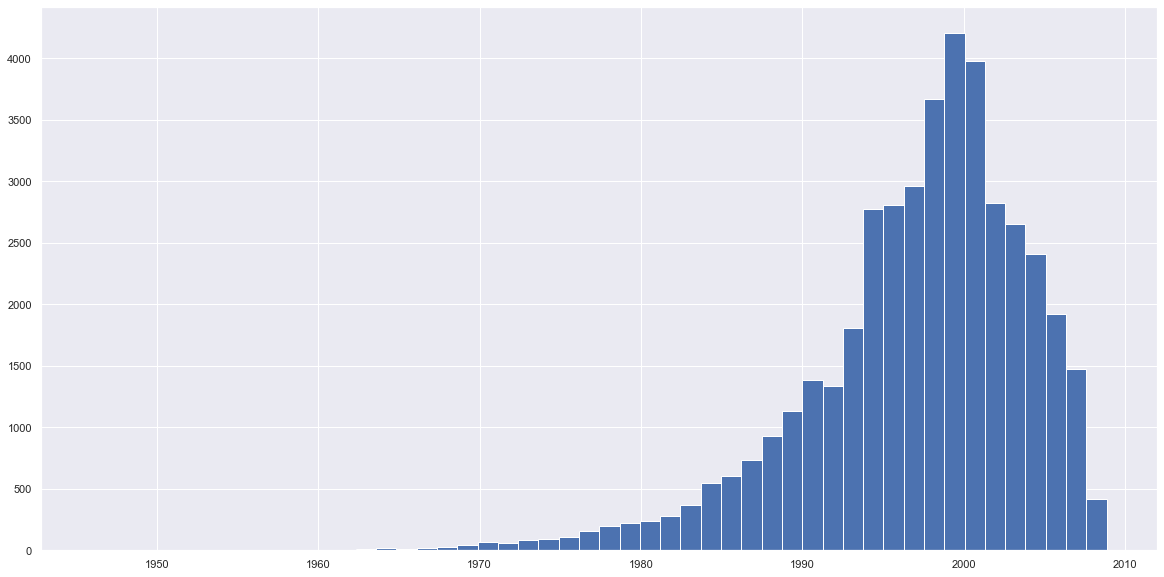

In [473]:
f, ax = plt.subplots(figsize = (20, 10))
ax = plt.gca()
ax.hist(loans_main.earliest_cr_line.values, bins = 50)

In [474]:
loans_main['credit_history'] = loans_main.issue_d - loans_main.earliest_cr_line
loans_main.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0     5000.0       5000.0           4975.0    36     10.65       162.87     B   
1     2500.0       2500.0           2500.0    60     15.27        59.83     C   
2     2400.0       2400.0           2400.0    36     15.96        84.33     C   
3    10000.0      10000.0          10000.0    36     13.49       339.31     C   
4     3000.0       3000.0           3000.0    60     12.69        67.79     B   

  sub_grade  emp_length home_ownership  annual_inc verification_status  \
0        B2          10           RENT     24000.0            Verified   
1        C4           0           RENT     30000.0     Source Verified   
2        C5          10           RENT     12252.0        Not Verified   
3        C1          10           RENT     49200.0     Source Verified   
4        B5           1           RENT     80000.0     Source Verified   

     issue_d         purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0 2011-12-01     credit_card         AZ  27.65          0.0       1985-01-01   
1 2011-12-01             car         GA   1.00          0.0       1999-04-01   
2 2011-12-01  small_business         IL   8.72          0.0       2001-11-01   
3 2011-12-01           other         CA  20.00          0.0       1996-02-01   
4 2011-12-01           other         OR  17.94          0.0       1996-01-01   

   fico_range_low  fico_range_high  inq_last_6mths  mths_since_last_delinq  \
0           735.0            739.0             1.0                     NaN   
1           740.0            744.0             5.0                     NaN   
2           735.0            739.0             2.0                     NaN   
3           690.0            694.0             1.0                    35.0   
4           695.0            699.0             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0    13648.0        83.7   
1                     NaN       3.0      0.0     1687.0         9.4   
2                     NaN       2.0      0.0     2956.0        98.5   
3                     NaN      10.0      0.0     5598.0        21.0   
4                     NaN      15.0      0.0    27783.0        53.9   

   total_acc  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0        9.0      5863.16          5833.84          5000.00         863.16   
1        4.0      1014.53          1014.53           456.46         435.17   
2       10.0      3005.67          3005.67          2400.00         605.67   
3       37.0     12231.89         12231.89         10000.00        2214.92   
4       38.0      4066.91          4066.91          3000.00        1066.91   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00         0.0                     0.00   2015-01-01   
1                0.00       122.9                     1.11   2013-04-01   
2                0.00         0.0                     0.00   2014-06-01   
3               16.97         0.0                     0.00   2015-01-01   
4                0.00         0.0                     0.00   2017-01-01   

   last_pymnt_amnt last_credit_pull_d  last_fico_range_high  \
0           171.62         2018-08-01                 739.0   
1           119.66         2016-10-01                 499.0   
2           649.91         2017-06-01                 739.0   
3           357.48         2016-04-01                 604.0   
4            67.30         2018-04-01                 684.0   

   last_fico_range_low  acc_now_delinq  delinq_amnt  pub_rec_bankruptcies  \
0                735.0             0.0          0.0                   0.0   
1                  0.0             0.0          0.0                   0.0   
2                735.0             0.0          0.0                   0.0   
3                600.0             0.0          0.0                   0.0   
4         

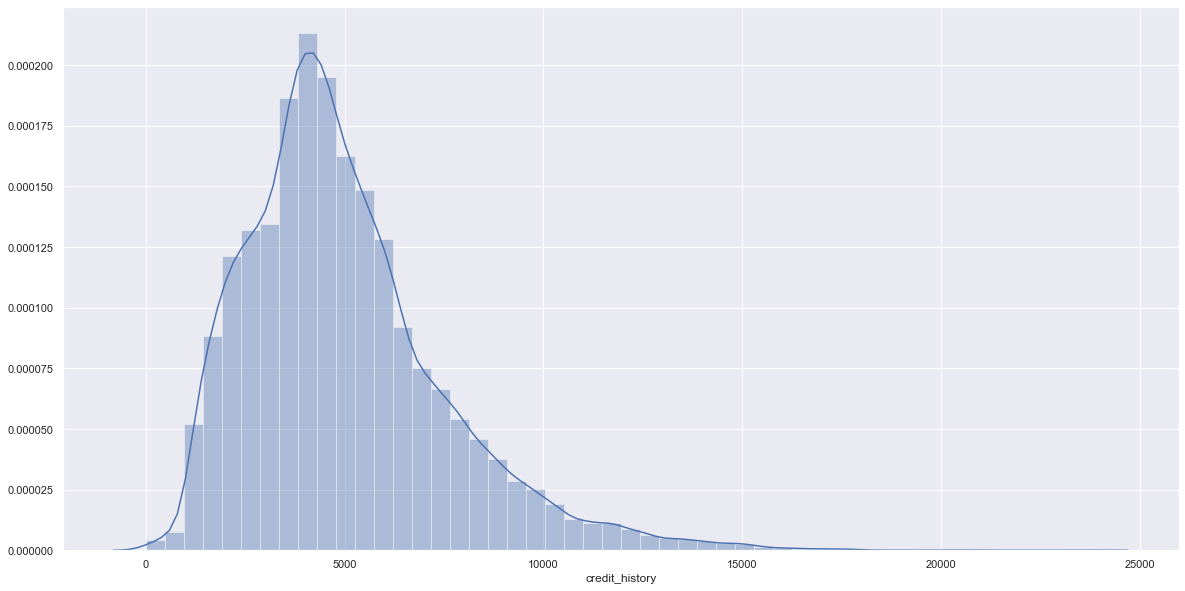

In [475]:
f, ax = plt.subplots(figsize = (20, 10))
loans_main.credit_history = (loans_main.credit_history).astype('timedelta64[D]')
sns.distplot(loans_main.credit_history)

In [476]:
loans_main.credit_history.describe()

count    42535.000000
mean      4989.846620
std       2518.639381
min          0.000000
25%       3287.000000
50%       4564.000000
75%       6209.000000
max      23892.000000
Name: credit_history, dtype: float64

In [477]:
# I'm checking the outliers
interquartile_credit_history = iqr(loans_main.credit_history)
credit_history_range = max(loans_main.credit_history) - min(loans_main.credit_history)
credit_history_outliers = loans_main[((loans_main.credit_history - loans_main.credit_history.mean()) / loans_main.credit_history.std()).abs() >3]
print('Number of outliers in annual income score:' +str(credit_history_outliers['annual_inc'].count()))
print("The range of the dataset is "+str(credit_history_range)+' days')
print("The interquartile (IQR) of the dataset is "+str(interquartile_credit_history)+' days ')

Number of outliers in annual income score:560
The range of the dataset is 23892.0 days
The interquartile (IQR) of the dataset is 2922.0 days 


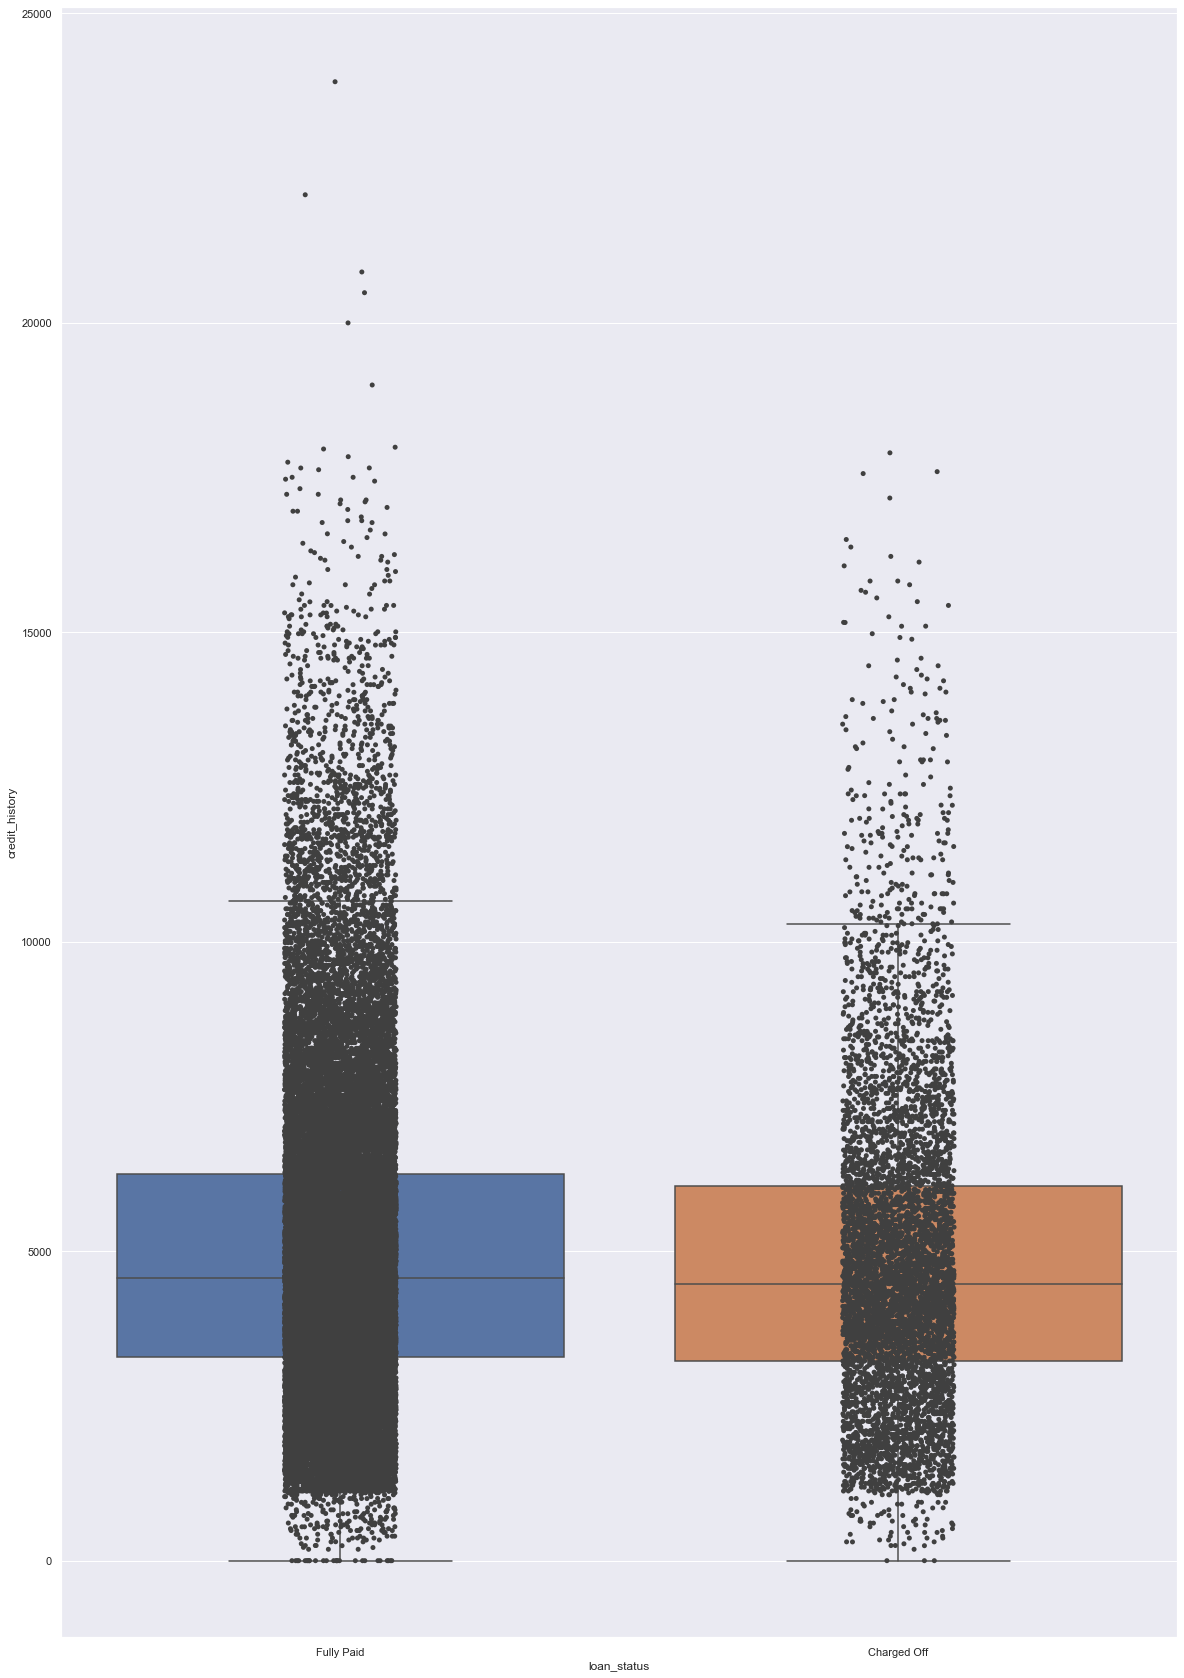

In [478]:
f, ax = plt.subplots(figsize = (20, 30))
sns.boxplot(x = 'loan_status', y = 'credit_history', data = loans_main, showfliers = False)
ax = sns.stripplot(x="loan_status", y="credit_history", data=loans_main, color=".25")

In [479]:
loans_main.loc[(loans_main.earliest_cr_line == '1946')]

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
14118     6000.0       6000.0           6000.0    36     10.59       195.27   

      grade sub_grade  emp_length home_ownership  annual_inc  \
14118     B        B2           6       MORTGAGE     33360.0   

      verification_status    issue_d           purpose addr_state  dti  \
14118        Not Verified 2011-06-01  home_improvement         MO  0.0   

       delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
14118          0.0       1946-01-01           710.0            714.0   

       inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
14118             0.0                    78.0                    70.0   

       open_acc  pub_rec  revol_bal  revol_util  total_acc  total_pymnt  \
14118       5.0      2.0        0.0         0.0        7.0      7029.69   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
14118          7029.69           6000.0        1029.69                 0.0   

       recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
14118         0.0                      0.0   2014-06-01           207.04   

      last_credit_pull_d  last_fico_range_high  last_fico_range_low  \
14118         2014-09-01                 689.0                685.0   

       acc_now_delinq  delinq_amnt  pub_rec_bankruptcies  tax_liens  \
14118             0.0          0.0                   0.0        0.0   

      loan_status  policy_code  FICO_mean  count  is_amnt_outlier  \
14118  Fully Paid            1      712.0      1                0   

            amount_bins FICO_group  is_income_outlier  credit_history  
14118  (5000.0, 6000.0]       Good                  0         23892.0

There is one loan from 1946, I presume this can be a mistake as such person would be at least 83 in 2011, but still it's possible that they actually got the loan. Therefore I leave it, even though it could be disturbing.

In [480]:
max(loans_main.issue_d)

Timestamp('2011-12-01 00:00:00')

I'll check how the group of oldest clients look like. I set the demarcation line on 1990 assuming that one gets first loan at 18 years old the earliest and knowing we have the latest loans in 2011, the youngest borrowers would be 49 then. I'm curious if they are better borrowers then younger ones

In [481]:
credit_history_earliest = loans_main.loc[loans_main.earliest_cr_line < '1990']
credit_history_earliest.describe()

loan_amnt   funded_amnt  funded_amnt_inv         term     int_rate  \
count   5928.000000   5928.000000      5928.000000  5928.000000  5928.000000   
mean   12666.316633  12280.891532     11500.695526    42.663968    11.499364   
std     8134.689961   7854.554156      7891.210550    10.749244     3.768589   
min      500.000000    500.000000         0.000000    36.000000     5.420000   
25%     6000.000000   6000.000000      5361.022766    36.000000     7.900000   
50%    10237.500000  10000.000000      9950.000000    36.000000    11.360000   
75%    18000.000000  16750.000000     15875.000000    60.000000    13.920000   
max    35000.000000  35000.000000     35000.000000    60.000000    24.590000   

       installment   emp_length    annual_inc          dti  delinq_2yrs  \
count  5928.000000  5928.000000  5.928000e+03  5928.000000  5928.000000   
mean    361.079347     5.923920  8.570304e+04    13.673495     0.212551   
std     230.365134     3.970294  7.241178e+04     6.781297     0.596399   
min      16.310000     0.000000  6.000000e+03     0.000000     0.000000   
25%     182.620000     2.000000  5.000000e+04     8.530000     0.000000   
50%     312.335000     6.000000  7.170550e+04    13.760000     0.000000   
75%     492.455000    10.000000  1.020000e+05    18.880000     0.000000   
max    1288.100000    10.000000  1.900000e+06    29.960000     9.000000   

       fico_range_low  fico_range_high  inq_last_6mths  \
count     5928.000000      5928.000000     5928.000000   
mean       726.124325       730.124325        1.035088   
std         39.942027        39.942027        1.500616   
min        640.000000       644.000000        0.000000   
25%        695.000000       699.000000        0.000000   
50%        725.000000       729.000000        1.000000   
75%        755.000000       759.000000        2.000000   
max        825.000000       829.000000       25.000000   

       mths_since_last_delinq  mths_since_last_record     open_acc  \
count             2479.000000              515.000000  5928.000000   
mean                33.316257               64.312621    11.042679   
std                 21.987505               47.386700     5.045201   
min                  0.000000                0.000000     2.000000   
25%                 15.000000                0.000000     7.000000   
50%                 31.000000               89.000000    10.000000   
75%                 48.000000              104.000000    14.000000   
max                 83.000000              119.000000    47.000000   

           pub_rec     revol_bal   revol_util    total_acc   total_pymnt  \
count  5928.000000  5.928000e+03  5928.000000  5928.000000   5928.000000   
mean      0.060729  2.285428e+04    46.235558    27.669534  13792.679823   
std       0.246500  3.732678e+04    28.658547    12.244966  10193.909863   
min       0.000000  0.000000e+00     0.000000     3.000000      0.000000   
25%       0.000000  5.900250e+03    21.400000    19.000000   6091.600000   
50%       0.000000  1.379300e+04    45.700000    26.000000  11159.625000   
75%       0.000000  2.669600e+04    70.000000    35.000000  18852.422500   
max       3.000000  1.207359e+06   108.800000    80.000000  58480.140000   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count      5928.000000      5928.000000    5928.000000         5928.000000   
mean      12973.499259     11113.910660    2558.976621            1.564928   
std       10155.152595      7897.576395    2950.937321            8.629999   
min           0.000000         0.000000       0.000000            0.000000   
25%        5500.550000      5000.000000     703.785000            0.000000   
50%       10289.110000      9600.000000    1495.650000            0.000000   
75%       17995.650000     15000.000000    3298.522500            0.000000   
max       58438.370000     35000.010000   23480.140000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count 

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   1.,   0.,   0.,   2.,   0.,   0.,   6.,   7.,   9.,   8.,
         11.,   7.,  18.,  21.,  29.,  49.,  41.,  38.,  52.,  67.,  62.,
         80.,  78., 119., 135., 148., 166., 169., 192., 195., 315., 323.,
        452., 401., 551., 591., 745., 836.]),
 array([710397. , 710717.8, 711038.6, 711359.4, 711680.2, 712001. ,
        712321.8, 712642.6, 712963.4, 713284.2, 713605. , 713925.8,
        714246.6, 714567.4, 714888.2, 715209. , 715529.8, 715850.6,
        716171.4, 716492.2, 716813. , 717133.8, 717454.6, 717775.4,
        718096.2, 718417. , 718737.8, 719058.6, 719379.4, 719700.2,
        720021. , 720341.8, 720662.6, 720983.4, 721304.2, 721625. ,
        721945.8, 722266.6, 722587.4, 722908.2, 723229. , 723549.8,
        723870.6, 724191.4, 724512.2, 724833. , 725153.8, 725474.6,
        725795.4, 726116.2, 726437. ]),
 <a list of 50 Patch objects>)

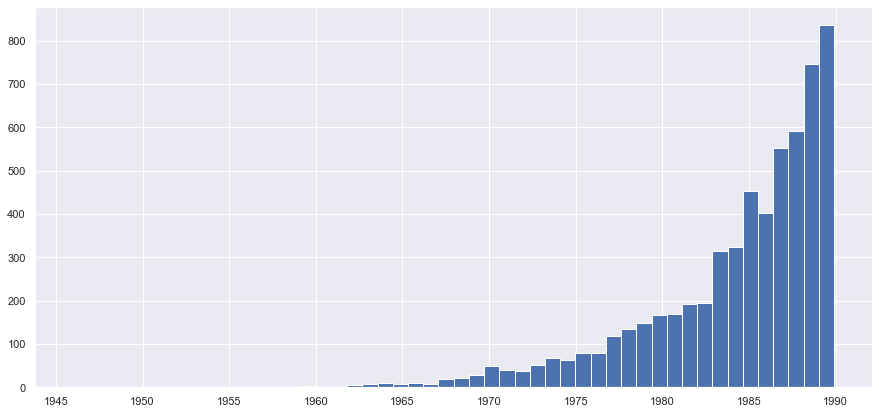

In [482]:
f, ax = plt.subplots(figsize = (15, 7))
ax = plt.gca()
ax.hist(credit_history_earliest.earliest_cr_line.values, bins = 50)

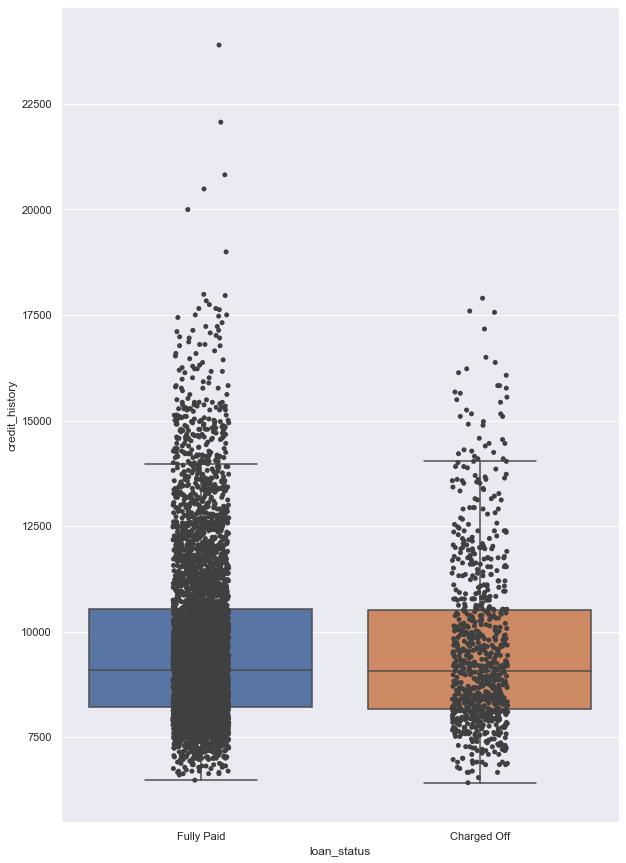

In [483]:
f, ax = plt.subplots(figsize = (10, 15))
sns.boxplot(x = 'loan_status', y = 'credit_history', data = credit_history_earliest, showfliers = False)
ax = sns.stripplot(x="loan_status", y="credit_history", data=credit_history_earliest, color=".25")

In [484]:
younger_are_more_solid = loans_main.loc[loans_main.earliest_cr_line >= '1990']
younger_are_more_solid.describe()

loan_amnt   funded_amnt  funded_amnt_inv          term  \
count  36607.000000  36607.000000     36607.000000  36607.000000   
mean   10834.414866  10585.271260      9919.582952     42.133253   
std     7254.934988   6997.160973      6976.029410     10.468251   
min      500.000000    500.000000         0.000000     36.000000   
25%     5000.000000   5000.000000      4833.300118     36.000000   
50%     9500.000000   9000.000000      8259.348210     36.000000   
75%    15000.000000  14500.000000     13800.000000     60.000000   
max    35000.000000  35000.000000     35000.000000     60.000000   

           int_rate   installment    emp_length    annual_inc           dti  \
count  36607.000000  36607.000000  36607.000000  3.660700e+04  36607.000000   
mean      12.272809    316.395596      4.611468  6.644629e+04     13.324389   
std        3.686782    204.569497      3.512106  6.223386e+04      6.716198   
min        5.420000     15.670000      0.000000  0.000000e+00      0.000000   
25%        9.760000    163.680000      2.000000  4.000000e+04      8.140000   
50%       12.180000    272.950000      4.000000  5.600000e+04     13.420000   
75%       14.820000    415.760000      8.000000  8.000000e+04     18.650000   
max       24.400000   1305.190000     10.000000  6.000000e+06     29.990000   

        delinq_2yrs  fico_range_low  fico_range_high  inq_last_6mths  \
count  36607.000000    36607.000000     36607.000000    36607.000000   
mean       0.142596      710.935750       714.935750        1.088071   
std        0.496605       35.088718        35.088718        1.531348   
min        0.000000      610.000000       614.000000        0.000000   
25%        0.000000      685.000000       689.000000        0.000000   
50%        0.000000      705.000000       709.000000        1.000000   
75%        0.000000      735.000000       739.000000        2.000000   
max       13.000000      820.000000       824.000000       33.000000   

       mths_since_last_delinq  mths_since_last_record      open_acc  \
count            13130.000000             3136.000000  36607.000000   
mean                35.338842               58.331952      9.061464   
std                 22.485241               47.059647      4.344541   
min                  0.000000                0.000000      0.000000   
25%                 17.000000                0.000000      6.000000   
50%                 33.000000               81.000000      8.000000   
75%                 52.000000              101.000000     11.000000   
max                120.000000              129.000000     41.000000   

            pub_rec      revol_bal    revol_util     total_acc   total_pymnt  \
count  36607.000000   36607.000000  36607.000000  36607.000000  36607.000000   
mean       0.057694   12912.266534     49.463034     21.208922  11733.159257   
std        0.245494   17998.736610     28.360641     11.240267   8870.819818   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.000000    3392.000000     26.365000     13.000000   5366.995000   
50%        0.000000    8264.000000     50.100000     20.000000   9447.960000   
75%        0.000000   15956.000000     73.100000     28.000000  15941.275000   
max        5.000000  602519.000000    119.000000     90.000000  58886.470000   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     36607.000000     36607.000000   36607.000000        36607.000000   
mean      11043.790544      9442.773610    2188.324564            1.509110   
std        8815.193302      6941.203762    2517.061784            7.692804   
min           0.000000         0.000000       0.000000            0.000000   
25%        4696.290000      4200.000000     648.410000            0.000000   
50%        8784.320000      8000.000000    1317.950000            0.000000   
75%       15115.785000     13000.000000    2728.565000            0.000000   
max       58563.680000     35000.020000   23886.470

In [485]:
older_are_more_solid_perc = round((credit_history_earliest['loan_status'].value_counts()/credit_history_earliest['loan_status'].count()*100), 1)
older_are_more_solid_perc.reset_index()

index  loan_status
0   Fully Paid         85.9
1  Charged Off         14.1

In [486]:
younger_are_more_solid_perc = round((younger_are_more_solid['loan_status'].value_counts()/younger_are_more_solid['loan_status'].count()*100), 1)
younger_are_more_solid_perc.reset_index()

index  loan_status
0   Fully Paid         84.7
1  Charged Off         15.3

The differences are realy slight therefore I can't make a conclusion that those with longer credit history are better borrowers

I'm going to transform subgrade column into integers as they are ordinal number and check how they influence the pay back probability 

In [487]:
loans_main.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [488]:
loans_main.sub_grade = le.fit_transform(loans_main.sub_grade)
loans_main.sub_grade.head(20)

0         6
1        13
2        14
3        10
4         9
5         3
6        14
7        20
8        26
9         9
10       12
11        9
12       10
13        5
14        6
15       15
16       13
17        0
18        7
19        0
20       13
21        8
22        7
23        7
24        7
25        5
26       11
27       16
28        7
29        7
30        2
31        3
32       14
33        4
34       14
35        6
36        5
37        3
38        8
39        9
40        2
41        3
42       19
43       16
44        0
45        5
46        4
47        6
48        0
49        1
50        5
51        5
52        6
53       14
54        5
55       23
56       23
57        8
58        6
59       16
60        9
61       17
62       12
63       16
64        6
65        6
66       17
67       11
68       26
69       12
70       18
71       16
72       10
73       16
74        4
75       12
76       10
77       27
78        3
79       23
80       17
81       11
82        9
83  

In [489]:
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
pd.DataFrame.from_dict(integer_mapping, orient='index')

0
A1   0
A2   1
A3   2
A4   3
A5   4
B1   5
B2   6
B3   7
B4   8
B5   9
C1  10
C2  11
C3  12
C4  13
C5  14
D1  15
D2  16
D3  17
D4  18
D5  19
E1  20
E2  21
E3  22
E4  23
E5  24
F1  25
F2  26
F3  27
F4  28
F5  29
G1  30
G2  31
G3  32
G4  33
G5  34

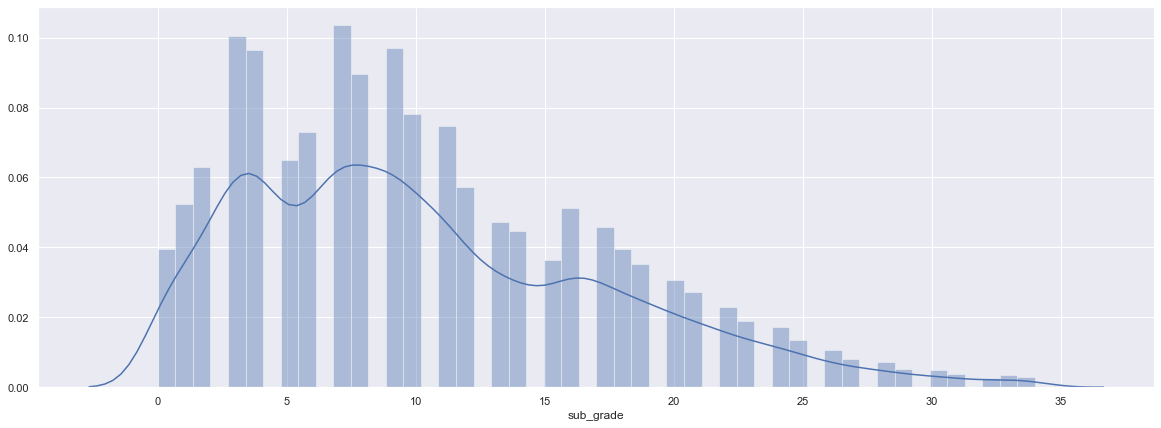

In [490]:
f, ax = plt.subplots(figsize = (20, 7))
sns.distplot(loans_main.sub_grade)

In [491]:
loans_main.sub_grade.skew()

0.7698069183528115

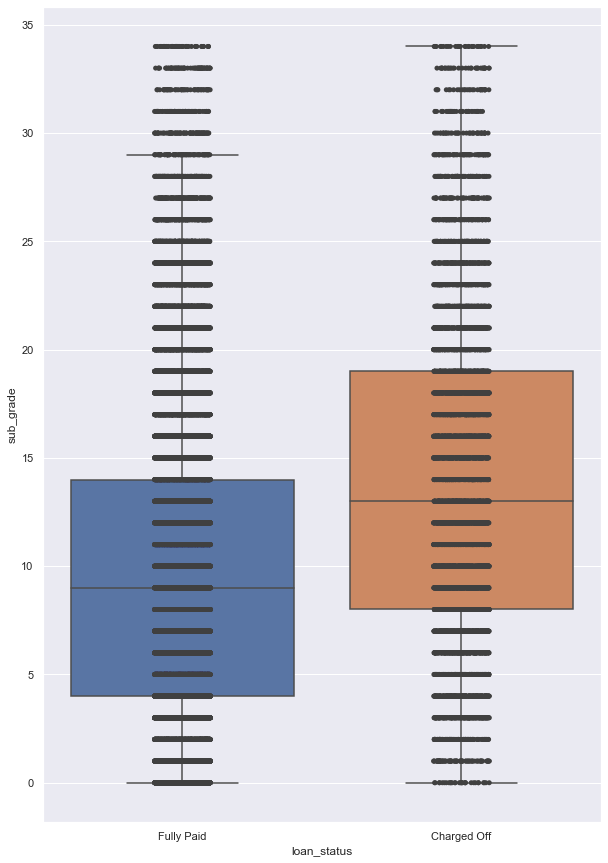

In [492]:
f, ax = plt.subplots(figsize = (10, 15))
sns.boxplot(x = 'loan_status', y = 'sub_grade', data = loans_main, showfliers = False)
ax = sns.stripplot(x="loan_status", y="sub_grade", data=loans_main, color=".25")

As we can observe, those with higher subgrade are visibly more present in group of borrowores who paid their loans.

In [493]:
loans_main.to_csv("loans_main.csv")